In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import ttest_ind

%matplotlib inline

# 0. Import notes...  
- the target is Home Team Win or Lose, 1 or 0, binary classificatin problem
- data was downloaded on 2022.03.04  
- The NBA preseason usually starts in October with the official season being end of October or early November. The season ends around mid-April, which is when the playoff starts. The finals usually end in June.
- Normally, each team plays 82 games in the regular season; shortened season in 2011 due to a strike  

- 2011-2012 season lockout: The 161-day lockout began on July 1, 2011 and ended on December 8, 2011. It delayed the start of the 2011–12 regular season from November to December, and it reduced the regular season from 82 to 66 games.  
--> 2010–11 NBA season: Duration	October 26, 2010 – April 13, 2011
April 16 – May 26, 2011 (Playoffs)
May 31 – June 12, 2011 (Finals)
Number of games	82
Number of teams	30

- 2019-2020 season Covid-19 Hiatus: the season was suspended on March 11, 2020; 22 Teams continued to play in July  

Duration	

    October 22, 2019 – March 11, 2020
    (regular season before suspension)
    July 30 – August 14, 2020
    (completion of regular season with "seeding" games)
    August 15, 2020
    (Play-in game)
    August 17 – September 27, 2020
    (Playoffs)
    September 30 – October 11, 2020
    (Finals)

Number of games	

    63–67 games per team before regular season suspension
    (total for 8 teams not in NBA Bubble)
    8 games per team after regular season suspension
    (71–75 total for 22 teams in NBA Bubble)

Number of teams	30
    July 30 – August 14, 2020
    (completion of regular season with "seeding" games)
    August 15, 2020
    (Play-in game)
    August 17 – September 27, 2020
    (Playoffs)
    September 30 – October 11, 2020
    (Finals)

- The DF that we work with in this project has games starting from the 2003 regular season, up until November 2021, including playoffs and pre-season games (no pre-season games for the 2003-04 season). About 18.5 seasons.  

- The 2004–05 NBA season was the 59th season of the National Basketball Association (NBA). It began on November 2, 2004 and ended June 23, 2005. The season ended with the San Antonio Spurs defeating the defending-champion Detroit Pistons, 4–3, in the NBA Finals.

- The play-in tournament format was implemented for the 2020 playoffs

# 1. Checking and cleaning data

games.csv is the main table with our target, 'HOME_TEAM_WINS'  1 or 0  
- we will import it as a pandas DataFrame, 'games_df' and will make a deep copy as 'df'
- 'df' will be the main DF that we'll be working with to derive new columns home, away, and all games df's, which in turn will be used to generate previous game averages (the features which we'll be using in our models)

In [2]:
games_df = pd.read_csv(r"data/games.csv") # raw string...

In [3]:
df = games_df.copy() # won't mess with the original import 'games_df'
df

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0        2021-11-17  22100213            Final    1610612766       1610612764   
1        2021-11-17  22100214            Final    1610612765       1610612754   
2        2021-11-17  22100215            Final    1610612737       1610612738   
3        2021-11-17  22100216            Final    1610612751       1610612739   
4        2021-11-17  22100217            Final    1610612748       1610612740   
...             ...       ...              ...           ...              ...   
25019    2014-10-06  11400007            Final    1610612737       1610612740   
25020    2014-10-06  11400004            Final    1610612741       1610612764   
25021    2014-10-06  11400005            Final    1610612747       1610612743   
25022    2014-10-05  11400002            Final    1610612761       1610612758   
25023    2014-10-04  11400001            Final    1610612748       1610612740   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
0        2021    1610612766      97.0        0.438        0.500  ...   
1        2021    1610612765      97.0        0.425        0.750  ...   
2        2021    1610612737     110.0        0.506        0.833  ...   
3        2021    1610612751     109.0        0.458        0.840  ...   
4        2021    1610612748     113.0        0.483        0.824  ...   
...       ...           ...       ...          ...          ...  ...   
25019    2014    1610612737      93.0        0.419        0.821  ...   
25020    2014    1610612741      81.0        0.338        0.719  ...   
25021    2014    1610612747      98.0        0.448        0.682  ...   
25022    2014    1610612761      99.0        0.440        0.771  ...   
25023    2014    1610612748      86.0        0.431        0.679  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
0          30.0      59.0    1610612764      87.0        0.367        0.813   
1          16.0      42.0    1610612754      89.0        0.418        0.737   
2          28.0      40.0    1610612738      99.0        0.440        0.824   
3          29.0      47.0    1610612739      99.0        0.393        0.857   
4          29.0      39.0    1610612740      98.0        0.440        0.786   
...         ...       ...           ...       ...          ...          ...   
25019      24.0      50.0    1610612740      87.0        0.366        0.643   
25020      18.0      40.0    1610612764      85.0        0.411        0.636   
25021      29.0      45.0    1610612743      95.0        0.387        0.659   
25022      21.0      30.0    1610612758      94.0        0.469        0.725   
25023      18.0      42.0    1610612740      98.0        0.462        0.706   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
0             0.190      23.0      48.0               1  
1             0.243      14.0      43.0               1  
2             0.268      24.0      42.0               1  
3             0.250      20.0      50.0               1  
4             0.286      18.0      38.0               1  
...             ...       ...       ...             ...  
25019         0.375      17.0      43.0               1  
25020         0.267      17.0      47.0               0  
25021         0.500      19.0      43.0               1  
25022         0.385      18.0      45.0               1  
25023         0.438      19.0      42.0               0  

[25024 rows x 21 columns]

In [4]:
df.shape

(25024, 21)

In [5]:
df.info() # object usually means string
# convert game_date_est to datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25024 entries, 0 to 25023
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25024 non-null  object 
 1   GAME_ID           25024 non-null  int64  
 2   GAME_STATUS_TEXT  25024 non-null  object 
 3   HOME_TEAM_ID      25024 non-null  int64  
 4   VISITOR_TEAM_ID   25024 non-null  int64  
 5   SEASON            25024 non-null  int64  
 6   TEAM_ID_home      25024 non-null  int64  
 7   PTS_home          24925 non-null  float64
 8   FG_PCT_home       24925 non-null  float64
 9   FT_PCT_home       24925 non-null  float64
 10  FG3_PCT_home      24925 non-null  float64
 11  AST_home          24925 non-null  float64
 12  REB_home          24925 non-null  float64
 13  TEAM_ID_away      25024 non-null  int64  
 14  PTS_away          24925 non-null  float64
 15  FG_PCT_away       24925 non-null  float64
 16  FT_PCT_away       24925 non-null  float6

- Is GAME_ID unique to each row? No

In [6]:
df['GAME_ID'].unique()

array([22100213, 22100214, 22100215, ..., 11400005, 11400002, 11400001],
      dtype=int64)

In [7]:
print(type(df['GAME_ID'].unique()))
print(df['GAME_ID'].unique())
print(len(df['GAME_ID'].unique()))
print(df.shape[0]-len(df['GAME_ID'].unique()))

# 44 rows are duplicates of an existing 'GAME_ID'
# The order of this index is not chronological, must sort by 'GAME_DATE_EST'

<class 'numpy.ndarray'>
[22100213 22100214 22100215 ... 11400005 11400002 11400001]
24980
44


In [8]:
df.describe()

GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID        SEASON  \
count  2.502400e+04  2.502400e+04     2.502400e+04  25024.000000   
mean   2.167942e+07  1.610613e+09     1.610613e+09   2011.513867   
std    5.579698e+06  8.636816e+00     8.656774e+00      5.228157   
min    1.030000e+07  1.610613e+09     1.610613e+09   2003.000000   
25%    2.060090e+07  1.610613e+09     1.610613e+09   2007.000000   
50%    2.120001e+07  1.610613e+09     1.610613e+09   2012.000000   
75%    2.170012e+07  1.610613e+09     1.610613e+09   2016.000000   
max    5.200021e+07  1.610613e+09     1.610613e+09   2021.000000   

       TEAM_ID_home      PTS_home   FG_PCT_home   FT_PCT_home  FG3_PCT_home  \
count  2.502400e+04  24925.000000  24925.000000  24925.000000  24925.000000   
mean   1.610613e+09    102.853200      0.460177      0.759202      0.356024   
std    8.636816e+00     13.124773      0.056695      0.100675      0.112786   
min    1.610613e+09     36.000000      0.250000      0.143000      0.000000   
25%    1.610613e+09     94.000000      0.421000      0.696000      0.286000   
50%    1.610613e+09    102.000000      0.459000      0.765000      0.357000   
75%    1.610613e+09    111.000000      0.500000      0.828000      0.429000   
max    1.610613e+09    168.000000      0.684000      1.000000      1.000000   

           AST_home      REB_home  TEAM_ID_away      PTS_away   FG_PCT_away  \
count  24925.000000  24925.000000  2.502400e+04  24925.000000  24925.000000   
mean      22.666760     43.302106  1.610613e+09     99.998114      0.448975   
std        5.168521      6.610744  8.656774e+00     13.251149      0.055501   
min        6.000000     15.000000  1.610613e+09     33.000000      0.244000   
25%       19.000000     39.000000  1.610613e+09     91.000000      0.411000   
50%       22.000000     43.000000  1.610613e+09    100.000000      0.448000   
75%       26.000000     48.000000  1.610613e+09    109.000000      0.486000   
max       50.000000     72.000000  1.610613e+09    168.000000      0.674000   

        FT_PCT_away  FG3_PCT_away      AST_away      REB_away  HOME_TEAM_WINS  
count  24925.000000  24925.000000  24925.000000  24925.000000    25024.000000  
mean       0.757640      0.349365     21.314022     42.021745        0.588875  
std        0.103315      0.111003      5.122301      6.524002        0.492048  
min        0.143000      0.000000      4.000000     19.000000        0.000000  
25%        0.692000      0.278000     18.000000     38.000000        0.000000  
50%        0.763000      0.350000     21.000000     42.000000        1.000000  
75%        0.829000      0.421000     25.000000     46.000000        1.000000  
max        1.000000      1.000000     46.000000     81.000000        1.000000

shape indicated 25024 rows and but according to the "count" it looks like there may be missing/null values for the following rows:  
PTS_home 	FG_PCT_home 	FT_PCT_home 	FG3_PCT_home 	AST_home 	REB_home 	   
PTS_away 	FG_PCT_away 	FT_PCT_away 	FG3_PCT_away 	AST_away 	REB_away  
  
- all of these columns have the same number of rows, 24925 which means they are missing 25024 - 24925 = 99 rows  
- importantly our target HOME_TEAM_WINS has full row count of 25024 (as it turns out, it's highly likely that the aforementioned 99 rows with NaN values, imputed the target with 0's because all 99 games are 0 meaning the home team never won). This is unlikely. Eventually handled this by eliminated the 2003 preseason which included all rows with NaN values.
--> is HOME_TEAM_WINS binary? Yes, every value is 0 or 1 (see below).

- What is count? same as non - null? we can dropna and find out, they should equal the same, else, need more exploring
- count goes up by 1 for a column for every non-NaN value in a cell, including True and False

In [9]:
df.isna().sum() # df.isna() will output a pandas df with True or False values, True if the cell is NaN
# .sum() adds up the values, True = 1, False = 0

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

- the 6 key stats for home and 6 for away are missing 99 values (are NaN)
- let's check if all 99 rows are missing the same columns

In [10]:
temp = df[df.PTS_home.isnull()] # boolean index for when 'PTS_home.isnull'
# if all the same rows are missing data, then the other 11 columns will have ALL have NaN values for every row

pd.set_option('display.max_rows', 500)
temp.head(100)

# note that home game didn't win a single game for these 99 rows. I suspect this is missing data imputed with zeroes

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
17548    2003-10-24  10300116            Final    1610612753       1610612762   
17549    2003-10-24  10300108            Final    1610612737       1610612764   
17550    2003-10-24  10300109            Final    1610612738       1610612751   
17551    2003-10-24  10300113            Final    1610612759       1610612745   
17552    2003-10-24  10300112            Final    1610612749       1610612765   
17553    2003-10-24  10300110            Final    1610612756       1610612757   
17554    2003-10-24  10300111            Final    1610612743       1610612754   
17555    2003-10-24  10300114            Final    1610612746       1610612744   
17556    2003-10-24  10300115            Final    1610612747       1610612758   
17557    2003-10-23  10300103            Final    1610612761       1610612739   
17558    2003-10-23  10300106            Final    1610612755       1610612751   
17559    2003-10-23  10300107            Final    1610612752       1610612762   
17560    2003-10-23  10300104            Final    1610612750       1610612754   
17561    2003-10-23  10300102            Final    1610612741       1610612763   
17562    2003-10-23  10300105            Final    1610612747       1610612746   
17563    2003-10-22  10300094            Final    1610612753       1610612737   
17564    2003-10-22  10300095            Final    1610612738       1610612750   
17565    2003-10-22  10300101            Final    1610612739       1610612764   
17566    2003-10-22  10300097            Final    1610612745       1610612743   
17567    2003-10-22  10300099            Final    1610612759       1610612740   
17568    2003-10-22  10300096            Final    1610612758       1610612742   
17569    2003-10-22  10300098            Final    1610612760       1610612744   
17570    2003-10-22  10300100            Final    1610612757       1610612756   
17571    2003-10-21  10300089            Final    1610612761       1610612741   
17572    2003-10-21  10300091            Final    1610612765       1610612749   
17573    2003-10-21  10300093            Final    1610612751       1610612752   
17574    2003-10-21  10300090            Final    1610612742       1610612762   
17575    2003-10-21  10300092            Final    1610612748       1610612763   
17576    2003-10-20  10300085            Final    1610612764       1610612737   
17577    2003-10-20  10300088            Final    1610612755       1610612740   
17578    2003-10-20  10300087            Final    1610612750       1610612749   
17579    2003-10-20  10300086            Final    1610612757       1610612743   
17580    2003-10-19  10300080            Final    1610612765       1610612743   
17581    2003-10-19  10300082            Final    1610612759       1610612742   
17582    2003-10-19  10300083            Final    1610612758       1610612760   
17583    2003-10-19  10300084            Final    1610612744       1610612746   
17584    2003-10-19  10300081            Final    1610612747       1610612739   
17585    2003-10-18  10300074            Final    1610612738       1610612754   
17586    2003-10-18  10300077            Final    1610612751       1610612761   
17587    2003-10-18  10300073            Final    1610612763       1610612737   
17588    2003-10-18  10300079            Final    1610612740       1610612764   
17589    2003-10-18  10300075            Final    1610612741       1610612749   
17590    2003-10-18  10300076            Final    1610612742       1610612755   
17591    2003-10-18  10300078            Final    1610612760       1610612757   
17592    2003-10-17  10300069            Final    1610612761       1610612743   
17593    2003-10-17  10300064            Final    1610612751       1610612738   
17594    2003-10-17  10300071            Final    1610612746       1610612739   
17595    2003-10-17  10300066            Final    1610612765       1610612748   
17596    2003-10-17  10300067        

for the 99 rows with NaN values, home team did not with a single game. I suspect that 0's were imputed for missing target data

In [11]:
temp.isna().sum()

# all 99 values for all 12 rows is accounted for, meaning all the NaN values come from the same 99 rows.

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [12]:
# a different, inferior way to suggest that the missing values come from the same rows...

# df[df.PTS_home.isnull()] # shows that rows of the data frame where PTS_home has NaN values

df[df.PTS_home.isnull()].count() # counts the number of non-NaN values in each column.

# we see that there are at least 99 rows. At least 99 rows are missing values for the 12 columns in question; can do .shape to see how many rows there are total

GAME_DATE_EST       99
GAME_ID             99
GAME_STATUS_TEXT    99
HOME_TEAM_ID        99
VISITOR_TEAM_ID     99
SEASON              99
TEAM_ID_home        99
PTS_home             0
FG_PCT_home          0
FT_PCT_home          0
FG3_PCT_home         0
AST_home             0
REB_home             0
TEAM_ID_away        99
PTS_away             0
FG_PCT_away          0
FT_PCT_away          0
FG3_PCT_away         0
AST_away             0
REB_away             0
HOME_TEAM_WINS      99
dtype: int64

In [13]:
print(df[df.PTS_home.isnull()]['HOME_TEAM_WINS'].sum()) # home team doesn't win a single game for these 99 games? I suspect that these may all have missing values that were imputed with zeroes
print(df[df.PTS_home.isnull()]['SEASON'].sum())

0
198297


In [14]:
# change 'GAME_DATE_EST' dtype to datetime

df['GAME_DATE_EST'] =  pd.to_datetime(df['GAME_DATE_EST']) #, format='%d%b%Y:%H:%M:%S.%f' <-- example of specifying the format parameter, but Pandas is smart enough to figure it out on its own

In [15]:
print(type(df['GAME_DATE_EST']))
print(type(df['GAME_DATE_EST'][0])) # class 'pandas._libs.tslibs.timestamps.Timestamp' <-- same thing as datetime
# pandas is build on numpy and datetype is a numpy specific data type.
print(df['GAME_DATE_EST'].dtype) # datetime64[ns]
df.info() # datetime65[ns]

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25024 entries, 0 to 25023
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     25024 non-null  datetime64[ns]
 1   GAME_ID           25024 non-null  int64         
 2   GAME_STATUS_TEXT  25024 non-null  object        
 3   HOME_TEAM_ID      25024 non-null  int64         
 4   VISITOR_TEAM_ID   25024 non-null  int64         
 5   SEASON            25024 non-null  int64         
 6   TEAM_ID_home      25024 non-null  int64         
 7   PTS_home          24925 non-null  float64       
 8   FG_PCT_home       24925 non-null  float64       
 9   FT_PCT_home       24925 non-null  float64       
 10  FG3_PCT_home      24925 non-null  float64       
 11  AST_home          24925 non-null  float64       
 12  REB_home          24925 non-

In [16]:
# comparing .describe() for when datetime column is treated as a categorical or numeric
# apparently they're going to get rid of the categorical treatment of datetime in the future; why? I like how categorical is described

print(df['GAME_DATE_EST'].describe())

print(df['GAME_DATE_EST'].describe(datetime_is_numeric=True))

print(df['GAME_DATE_EST'].describe(datetime_is_numeric=False))

# treating datetime column as a numeric does not output the mode of the series.

count                   25024
unique                   4042
top       2020-12-23 00:00:00
freq                       18
first     2003-10-05 00:00:00
last      2021-11-17 00:00:00
Name: GAME_DATE_EST, dtype: object
count                            25024
mean     2012-07-29 20:24:36.598465280
min                2003-10-05 00:00:00
25%                2008-01-16 00:00:00
50%                2012-11-02 00:00:00
75%                2017-01-15 00:00:00
max                2021-11-17 00:00:00
Name: GAME_DATE_EST, dtype: object
count                   25024
unique                   4042
top       2020-12-23 00:00:00
freq                       18
first     2003-10-05 00:00:00
last      2021-11-17 00:00:00
Name: GAME_DATE_EST, dtype: object


<ipython-input-16-fba5a83b297a>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['GAME_DATE_EST'].describe())
<ipython-input-16-fba5a83b297a>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['GAME_DATE_EST'].describe(datetime_is_numeric=False))


docstring for .describe() <-- for Series? could also be for DF

For object data (e.g. strings or timestamps), the result's index
will include ``count``, ``unique``, ``top``, and ``freq``. The ``top``
is the most common value. The ``freq`` is the most common value's
frequency. Timestamps also include the ``first`` and ``last`` items.

If multiple object values have the highest count, then the
``count`` and ``top`` results will be arbitrarily chosen from
among those with the highest count.

In [17]:
print(type(df['GAME_DATE_EST'].describe(datetime_is_numeric=False)))
print(df['GAME_DATE_EST'].describe(datetime_is_numeric=False)[0])
print(df['GAME_DATE_EST'].describe(datetime_is_numeric=False)[1])
print(df['GAME_DATE_EST'].describe(datetime_is_numeric=False)[0]/df['GAME_DATE_EST'].describe(datetime_is_numeric=False)[1])

<class 'pandas.core.series.Series'>
25024
4042
6.190994557149926


<ipython-input-17-5bfd74a838ec>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(type(df['GAME_DATE_EST'].describe(datetime_is_numeric=False)))
<ipython-input-17-5bfd74a838ec>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['GAME_DATE_EST'].describe(datetime_is_numeric=False)[0])
<ipython-input-17-5bfd74a838ec>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['GAM

- out of the dates when NBA games were played, on average 6.2 games were played

In [18]:
print(df['GAME_DATE_EST'].mode())

0   2020-12-23
dtype: datetime64[ns]


df.describe() shows...  
top       2020-12-23 00:00:00  
freq                       18

- indicates that the most games were played on Dec 23, 2020; first day of the 2020-2021 regular season (Season started late due to Covid)  
- this date appears for 18 rows, suggesting that there were 18 games played that day  
- recall that column name is 'GAME_DATE_EST' <-- EST stands for estimate?  
- google says that 13 games were played on this date, not 18  
https://www.google.com/search?q=nba+scedule+for+december+23+2020#sie=lg;/g/11jn2_x2b4;3;/m/05jvx;mt;fp;1;;  
- another source says 13 games: https://wikihoops.com/games/2020-12-23/  
- Basketball-Reference says only 12 games were played: https://www.basketball-reference.com/boxscores/index.fcgi?month=12&day=23&year=2020  
- it turns out 13 games were scheduled to play but only 12 games were played. 1 game was delayed due to Covid.

- Thunder vs Rockets game was postponed this day! hence only 12 games were actually played.  
  https://www.sportingnews.com/ca/nba/news/nba-postpones-game-between-oklahoma-city-thunder-and-houston-rockets-in-accordance-with-league-health-safety-protocols/1umybo0tq3x2f1r7epsh2363ca
  "Dec. 23, 2020 – The National Basketball Association game scheduled for tonight between the Oklahoma City Thunder and the Houston Rockets at Toyota Center has been postponed in accordance with the league’s Health and Safety Protocols. 

Three Houston Rockets players have returned tests that were either positive or inconclusive for coronavirus under the NBA’s testing program."


- the 13 games originally scheduled on 2020-12-23  
NBA regular season schedule for Dec. 23

Charlotte Hornets vs. Cleveland Cavaliers, 7:00 p.m. ET  Spread: CLE +2
New York Knicks vs. Indiana Pacers, 7:00 p.m. ET  Spread: IND -8
Miami Heat vs. Orlando Magic, 7:00 p.m. ET  Spread: ORL +4.5
Washington Wizards vs. Philadelphia 76ers, 7:00 p.m. ET  Spread: PHI -7.5
New Orleans Pelicans vs. Toronto Raptors, 7:30 p.m. ET  Spread: TOR -4.5
Atlanta Hawks vs. Chicago Bulls, 8:00 p.m. ET  Spread: CHI +2
Oklahoma City Thunder vs. Houston Rockets, 8:00 p.m. ET  Spread: HOU -7
San Antonio Spurs vs. Memphis Grizzlies, 8:00 p.m. ET  Spread: MEM -2
Detroit Pistons vs. Minnesota Timberwolves, 8:00 p.m. ET  Spread: -4.5
Sacramento Kings vs. Denver Nuggets, 9:00 p.m. ET  Spread: DEN -8.5
Utah Jazz vs. Portland Trail Blazers, 10:00 p.m. ET  Spread: POR -1.5

National broadcasts for Dec. 23 games
Milwaukee Bucks vs. Boston Celtics, 7:30 p.m. ET on TNT  Spread: BOS +3.5
Dallas Mavericks vs. Phoenix Suns, 10:30 p.m. ET on ESPN  Spread: PHX -1

- 18 entries for Dec 23, 2020. When only 12 games were played. Possibilities?  
1. game dates are estimates. the dates are a little off. 6 of the games were played on a different date
2. there are duplicate rows of the same game <-- this turns out to be what's going on.

In [19]:
df[(df['GAME_DATE_EST'] == "2020-12-23")]

# of the 18 games, the following GAME_ID's are duplicated: 22000011  22000012  22000013  22000015  22000018  22000004  
# this accounts for the 6 extra games (only 12 games were played that game)
# ??? what's going on?

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
897     2020-12-23  22000010            Final    1610612739       1610612766   
898     2020-12-23  22000011            Final    1610612754       1610612752   
899     2020-12-23  22000012            Final    1610612753       1610612748   
900     2020-12-23  22000013            Final    1610612755       1610612764   
901     2020-12-23  22000003            Final    1610612738       1610612749   
902     2020-12-23  22000014            Final    1610612761       1610612740   
903     2020-12-23  22000015            Final    1610612741       1610612737   
904     2020-12-23  22000017            Final    1610612763       1610612759   
905     2020-12-23  22000018            Final    1610612750       1610612765   
906     2020-12-23  22000019            Final    1610612743       1610612758   
907     2020-12-23  22000020            Final    1610612757       1610612762   
908     2020-12-23  22000004            Final    1610612756       1610612742   
1498    2020-12-23  22000011            Final    1610612754       1610612752   
1499    2020-12-23  22000012            Final    1610612753       1610612748   
1500    2020-12-23  22000013            Final    1610612755       1610612764   
1501    2020-12-23  22000015            Final    1610612741       1610612737   
1502    2020-12-23  22000018            Final    1610612750       1610612765   
1503    2020-12-23  22000004            Final    1610612756       1610612742   

      SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
897     2020    1610612739     121.0        0.529        0.750  ...      34.0   
898     2020    1610612754     121.0        0.489        0.724  ...      28.0   
899     2020    1610612753     113.0        0.477        0.633  ...      23.0   
900     2020    1610612755     113.0        0.471        0.767  ...      22.0   
901     2020    1610612738     122.0        0.475        0.727  ...      23.0   
902     2020    1610612761      99.0        0.427        0.750  ...      26.0   
903     2020    1610612741     104.0        0.414        0.857  ...      20.0   
904     2020    1610612763     119.0        0.516        0.611  ...      27.0   
905     2020    1610612750     111.0        0.432        0.857  ...      25.0   
906     2020    1610612743     122.0        0.480        0.833  ...      28.0   
907     2020    1610612757     100.0        0.402        0.824  ...      23.0   
908     2020    1610612756     106.0        0.481        0.704  ...      21.0   
1498    2020    1610612754     121.0        0.489        0.724  ...      28.0   
1499    2020    1610612753     113.0        0.477        0.633  ...      23.0   
1500    2020    1610612755     113.0        0.471        0.767  ...      22.0   
1501    2020    1610612741     104.0        0.414        0.857  ...      20.0   
1502    2020    1610612750     111.0        0.432        0.857  ...      25.0   
1503    2020    1610612756     106.0        0.481        0.704  ...      21.0   

      REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
897       50.0    1610612766     114.0        0.500        0.533   
898       50.0    1610612752     107.0        0.459        0.739   
899       41.0    1610612748     107.0        0.506        0.842   
900       47.0    1610612764     107.0        0.459        0.696   
901       37.0    1610612749     121.0        0.511        0.833   
902       35.0    1610612740     113.0        0.525        0.500   
903       37.0    1610612737     124.0        0.538        0.828   
904       42.0    1610612759     131.0        0.505        0.862   
905       48.0    1610612765     101.0        0.484        0.375   
906       46.0    1610612758     124.0        0.441        0.774   
907       40.0    1610612762     120.0        0.457        0.789   
908       48.0    1610612742     102.0        0.424        0.808   
1498      50.0    1610612752     107.0        0.459        0

In [20]:
len(df[(df['GAME_DATE_EST'] == "2020-12-23")].GAME_ID.unique())

12

In [21]:
df[df.GAME_ID.isin([22000011, 22000012, 22000013, 22000015, 22000018, 22000004])].sort_values(by='GAME_ID')

# seems like they are exact duplicate rows (i.e. all the columns are the same for the duplicate pairs).

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
908     2020-12-23  22000004            Final    1610612756       1610612742   
1503    2020-12-23  22000004            Final    1610612756       1610612742   
898     2020-12-23  22000011            Final    1610612754       1610612752   
1498    2020-12-23  22000011            Final    1610612754       1610612752   
899     2020-12-23  22000012            Final    1610612753       1610612748   
1499    2020-12-23  22000012            Final    1610612753       1610612748   
900     2020-12-23  22000013            Final    1610612755       1610612764   
1500    2020-12-23  22000013            Final    1610612755       1610612764   
903     2020-12-23  22000015            Final    1610612741       1610612737   
1501    2020-12-23  22000015            Final    1610612741       1610612737   
905     2020-12-23  22000018            Final    1610612750       1610612765   
1502    2020-12-23  22000018            Final    1610612750       1610612765   

      SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
908     2020    1610612756     106.0        0.481        0.704  ...      21.0   
1503    2020    1610612756     106.0        0.481        0.704  ...      21.0   
898     2020    1610612754     121.0        0.489        0.724  ...      28.0   
1498    2020    1610612754     121.0        0.489        0.724  ...      28.0   
899     2020    1610612753     113.0        0.477        0.633  ...      23.0   
1499    2020    1610612753     113.0        0.477        0.633  ...      23.0   
900     2020    1610612755     113.0        0.471        0.767  ...      22.0   
1500    2020    1610612755     113.0        0.471        0.767  ...      22.0   
903     2020    1610612741     104.0        0.414        0.857  ...      20.0   
1501    2020    1610612741     104.0        0.414        0.857  ...      20.0   
905     2020    1610612750     111.0        0.432        0.857  ...      25.0   
1502    2020    1610612750     111.0        0.432        0.857  ...      25.0   

      REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
908       48.0    1610612742     102.0        0.424        0.808   
1503      48.0    1610612742     102.0        0.424        0.808   
898       50.0    1610612752     107.0        0.459        0.739   
1498      50.0    1610612752     107.0        0.459        0.739   
899       41.0    1610612748     107.0        0.506        0.842   
1499      41.0    1610612748     107.0        0.506        0.842   
900       47.0    1610612764     107.0        0.459        0.696   
1500      47.0    1610612764     107.0        0.459        0.696   
903       37.0    1610612737     124.0        0.538        0.828   
1501      37.0    1610612737     124.0        0.538        0.828   
905       48.0    1610612765     101.0        0.484        0.375   
1502      48.0    1610612765     101.0        0.484        0.375   

      FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
908          0.243      17.0      39.0               1  
1503         0.243      17.0      39.0               1  
898          0.429      25.0      40.0               1  
1498         0.429      25.0      40.0               1  
899          0.350      25.0      43.0               1  
1499         0.350      25.0      43.0               1  
900          0.481      28.0      40.0               1  
1500         0.481      28.0      40.0               1  
903          0.400      24.0      46.0               0  
1501         0.400      24.0      46.0               0  
905          0.229      29.0      44.0               1  
1502         0.229      29.0      44.0               1  

[12 rows x 21 columns]

In [22]:
print(df.drop_duplicates().shape) # by default remove rows where all of the columns are the same
print(df.shape)
df.shape[0] - df.drop_duplicates().shape[0]

# only 15 duplicates were dropped. recall that there should be 44 rows that are duplicates.

(25009, 21)
(25024, 21)


15

In [23]:
df.drop_duplicates()[df.GAME_ID.isin([22000011, 22000012, 22000013, 22000015, 22000018, 22000004])].sort_values(by='GAME_ID') # by default drops only if all the columns are equal

# ??? only 2 of the 6 duplicates were dropped; but ther remaining duplicate pairs look the same? all the same values for each cell? what's difference? extra spaces? different rounding?

<ipython-input-23-8479f6484216>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop_duplicates()[df.GAME_ID.isin([22000011, 22000012, 22000013, 22000015, 22000018, 22000004])].sort_values(by='GAME_ID') # by default drops only if all the columns are equal


GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
908     2020-12-23  22000004            Final    1610612756       1610612742   
898     2020-12-23  22000011            Final    1610612754       1610612752   
1498    2020-12-23  22000011            Final    1610612754       1610612752   
899     2020-12-23  22000012            Final    1610612753       1610612748   
900     2020-12-23  22000013            Final    1610612755       1610612764   
1500    2020-12-23  22000013            Final    1610612755       1610612764   
903     2020-12-23  22000015            Final    1610612741       1610612737   
1501    2020-12-23  22000015            Final    1610612741       1610612737   
905     2020-12-23  22000018            Final    1610612750       1610612765   
1502    2020-12-23  22000018            Final    1610612750       1610612765   

      SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
908     2020    1610612756     106.0        0.481        0.704  ...      21.0   
898     2020    1610612754     121.0        0.489        0.724  ...      28.0   
1498    2020    1610612754     121.0        0.489        0.724  ...      28.0   
899     2020    1610612753     113.0        0.477        0.633  ...      23.0   
900     2020    1610612755     113.0        0.471        0.767  ...      22.0   
1500    2020    1610612755     113.0        0.471        0.767  ...      22.0   
903     2020    1610612741     104.0        0.414        0.857  ...      20.0   
1501    2020    1610612741     104.0        0.414        0.857  ...      20.0   
905     2020    1610612750     111.0        0.432        0.857  ...      25.0   
1502    2020    1610612750     111.0        0.432        0.857  ...      25.0   

      REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
908       48.0    1610612742     102.0        0.424        0.808   
898       50.0    1610612752     107.0        0.459        0.739   
1498      50.0    1610612752     107.0        0.459        0.739   
899       41.0    1610612748     107.0        0.506        0.842   
900       47.0    1610612764     107.0        0.459        0.696   
1500      47.0    1610612764     107.0        0.459        0.696   
903       37.0    1610612737     124.0        0.538        0.828   
1501      37.0    1610612737     124.0        0.538        0.828   
905       48.0    1610612765     101.0        0.484        0.375   
1502      48.0    1610612765     101.0        0.484        0.375   

      FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
908          0.243      17.0      39.0               1  
898          0.429      25.0      40.0               1  
1498         0.429      25.0      40.0               1  
899          0.350      25.0      43.0               1  
900          0.481      28.0      40.0               1  
1500         0.481      28.0      40.0               1  
903          0.400      24.0      46.0               0  
1501         0.400      24.0      46.0               0  
905          0.229      29.0      44.0               1  
1502         0.229      29.0      44.0               1  

[10 rows x 21 columns]

In [24]:
df[df.duplicated(keep=False, subset=['GAME_ID'])].sort_values(by=['GAME_DATE_EST', 'GAME_ID']) 
# keep=False means that all of the duplicates are displayed, not just 1 in a group.

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
908     2020-12-23  22000004            Final    1610612756       1610612742   
1503    2020-12-23  22000004            Final    1610612756       1610612742   
898     2020-12-23  22000011            Final    1610612754       1610612752   
1498    2020-12-23  22000011            Final    1610612754       1610612752   
899     2020-12-23  22000012            Final    1610612753       1610612748   
1499    2020-12-23  22000012            Final    1610612753       1610612748   
900     2020-12-23  22000013            Final    1610612755       1610612764   
1500    2020-12-23  22000013            Final    1610612755       1610612764   
903     2020-12-23  22000015            Final    1610612741       1610612737   
1501    2020-12-23  22000015            Final    1610612741       1610612737   
905     2020-12-23  22000018            Final    1610612750       1610612765   
1502    2020-12-23  22000018            Final    1610612750       1610612765   
893     2020-12-25  22000006            Final    1610612749       1610612744   
1495    2020-12-25  22000006            Final    1610612749       1610612744   
894     2020-12-25  22000007            Final    1610612738       1610612751   
1496    2020-12-25  22000007            Final    1610612738       1610612751   
895     2020-12-25  22000008            Final    1610612747       1610612742   
1497    2020-12-25  22000008            Final    1610612747       1610612742   
882     2020-12-26  22000021            Final    1610612763       1610612737   
1489    2020-12-26  22000021            Final    1610612763       1610612737   
883     2020-12-26  22000022            Final    1610612766       1610612760   
1490    2020-12-26  22000022            Final    1610612766       1610612760   
888     2020-12-26  22000027            Final    1610612759       1610612761   
1491    2020-12-26  22000027            Final    1610612759       1610612761   
889     2020-12-26  22000028            Final    1610612762       1610612750   
1492    2020-12-26  22000028            Final    1610612762       1610612750   
890     2020-12-26  22000029            Final    1610612757       1610612745   
1493    2020-12-26  22000029            Final    1610612757       1610612745   
891     2020-12-26  22000030            Final    1610612758       1610612756   
1494    2020-12-26  22000030            Final    1610612758       1610612756   
873     2020-12-27  22000032            Final    1610612766       1610612751   
1484    2020-12-27  22000032            Final    1610612766       1610612751   
874     2020-12-27  22000033            Final    1610612764       1610612753   
1485    2020-12-27  22000033            Final    1610612764       1610612753   
875     2020-12-27  22000034            Final    1610612740       1610612759   
1486    2020-12-27  22000034            Final    1610612740       1610612759   
878     2020-12-27  22000037            Final    1610612754       1610612738   
1487    2020-12-27  22000037            Final    1610612754       1610612738   
879     2020-12-27  22000038            Final    1610612741       1610612744   
1488    2020-12-27  22000038            Final    1610612741       1610612744   
867     2020-12-28  22000041            Final    1610612737       1610612765   
1480    2020-12-28  22000041            Final    1610612737       1610612765   
868     2020-12-28  22000042            Final    1610612751       1610612763   
1481    2020-12-28  22000042            Final    1610612751       1610612763   
870     2020-12-28  22000044            Final    1610612743       1610612745   
1482    2020-12-28  22000044            Final    1610612743       1610612745   
871     2020-12-28  22000045            Final    1610612747       1610612757   
1483    2020-12-28  22000045            Final    1610612747       1610612757   
857     2020-12-29  22000046            Final    1610612739       1610612752   
1473 

In [25]:
len(df[df.duplicated(keep=False, subset=['GAME_ID'])].sort_values(by=['GAME_DATE_EST', 'GAME_ID']).GAME_ID.unique())
# 44 unique GAME_ID

44

- 44 duplicates x 2 = 88 rows, all the duplicates are accounted for 1 duplicate for each of the 44 columns
- however only 15 of these rows are exact duplicate rows (i.e. all columns are the same); how can we tell what exactly is different for each of these pairs??? they all look the same. (will put a pin in this)
- for now we'll just keep the first of the duplicates by GAME_ID only (knowing that there's differences between these rows somewhere in the other columns for 44-15 = 29 of the row pairs.
- note: the date range for all of these games is from the start of the 2020-2021 season: 2020-12-23 to 2021-01-01

In [26]:
# drop the 44 duplicates in-place by GAME_ID
# DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

df.drop_duplicates(subset='GAME_ID', keep='first', inplace=True)
df

# 24980 rows remain, we started with 25024, subtract 24980 = 44 rows dropped

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0        2021-11-17  22100213            Final    1610612766       1610612764   
1        2021-11-17  22100214            Final    1610612765       1610612754   
2        2021-11-17  22100215            Final    1610612737       1610612738   
3        2021-11-17  22100216            Final    1610612751       1610612739   
4        2021-11-17  22100217            Final    1610612748       1610612740   
...             ...       ...              ...           ...              ...   
25019    2014-10-06  11400007            Final    1610612737       1610612740   
25020    2014-10-06  11400004            Final    1610612741       1610612764   
25021    2014-10-06  11400005            Final    1610612747       1610612743   
25022    2014-10-05  11400002            Final    1610612761       1610612758   
25023    2014-10-04  11400001            Final    1610612748       1610612740   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
0        2021    1610612766      97.0        0.438        0.500  ...   
1        2021    1610612765      97.0        0.425        0.750  ...   
2        2021    1610612737     110.0        0.506        0.833  ...   
3        2021    1610612751     109.0        0.458        0.840  ...   
4        2021    1610612748     113.0        0.483        0.824  ...   
...       ...           ...       ...          ...          ...  ...   
25019    2014    1610612737      93.0        0.419        0.821  ...   
25020    2014    1610612741      81.0        0.338        0.719  ...   
25021    2014    1610612747      98.0        0.448        0.682  ...   
25022    2014    1610612761      99.0        0.440        0.771  ...   
25023    2014    1610612748      86.0        0.431        0.679  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
0          30.0      59.0    1610612764      87.0        0.367        0.813   
1          16.0      42.0    1610612754      89.0        0.418        0.737   
2          28.0      40.0    1610612738      99.0        0.440        0.824   
3          29.0      47.0    1610612739      99.0        0.393        0.857   
4          29.0      39.0    1610612740      98.0        0.440        0.786   
...         ...       ...           ...       ...          ...          ...   
25019      24.0      50.0    1610612740      87.0        0.366        0.643   
25020      18.0      40.0    1610612764      85.0        0.411        0.636   
25021      29.0      45.0    1610612743      95.0        0.387        0.659   
25022      21.0      30.0    1610612758      94.0        0.469        0.725   
25023      18.0      42.0    1610612740      98.0        0.462        0.706   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
0             0.190      23.0      48.0               1  
1             0.243      14.0      43.0               1  
2             0.268      24.0      42.0               1  
3             0.250      20.0      50.0               1  
4             0.286      18.0      38.0               1  
...             ...       ...       ...             ...  
25019         0.375      17.0      43.0               1  
25020         0.267      17.0      47.0               0  
25021         0.500      19.0      43.0               1  
25022         0.385      18.0      45.0               1  
25023         0.438      19.0      42.0               0  

[24980 rows x 21 columns]

In [27]:
# check to see if duplicate rows were dropped
print(df.shape)
print(len(df.GAME_ID.unique()))

# there are 24980 rows total in df for which there are 24980 unique GAME_ID

(24980, 21)
24980


In [28]:
df[(df['GAME_DATE_EST'] == "2020-12-23")] # 12 games were played this date, only 12 games of unique GAME_ID are shown (before we had 18, 6 duplicates)

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
897    2020-12-23  22000010            Final    1610612739       1610612766   
898    2020-12-23  22000011            Final    1610612754       1610612752   
899    2020-12-23  22000012            Final    1610612753       1610612748   
900    2020-12-23  22000013            Final    1610612755       1610612764   
901    2020-12-23  22000003            Final    1610612738       1610612749   
902    2020-12-23  22000014            Final    1610612761       1610612740   
903    2020-12-23  22000015            Final    1610612741       1610612737   
904    2020-12-23  22000017            Final    1610612763       1610612759   
905    2020-12-23  22000018            Final    1610612750       1610612765   
906    2020-12-23  22000019            Final    1610612743       1610612758   
907    2020-12-23  22000020            Final    1610612757       1610612762   
908    2020-12-23  22000004            Final    1610612756       1610612742   

     SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
897    2020    1610612739     121.0        0.529        0.750  ...      34.0   
898    2020    1610612754     121.0        0.489        0.724  ...      28.0   
899    2020    1610612753     113.0        0.477        0.633  ...      23.0   
900    2020    1610612755     113.0        0.471        0.767  ...      22.0   
901    2020    1610612738     122.0        0.475        0.727  ...      23.0   
902    2020    1610612761      99.0        0.427        0.750  ...      26.0   
903    2020    1610612741     104.0        0.414        0.857  ...      20.0   
904    2020    1610612763     119.0        0.516        0.611  ...      27.0   
905    2020    1610612750     111.0        0.432        0.857  ...      25.0   
906    2020    1610612743     122.0        0.480        0.833  ...      28.0   
907    2020    1610612757     100.0        0.402        0.824  ...      23.0   
908    2020    1610612756     106.0        0.481        0.704  ...      21.0   

     REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
897      50.0    1610612766     114.0        0.500        0.533         0.364   
898      50.0    1610612752     107.0        0.459        0.739         0.429   
899      41.0    1610612748     107.0        0.506        0.842         0.350   
900      47.0    1610612764     107.0        0.459        0.696         0.481   
901      37.0    1610612749     121.0        0.511        0.833         0.400   
902      35.0    1610612740     113.0        0.525        0.500         0.452   
903      37.0    1610612737     124.0        0.538        0.828         0.400   
904      42.0    1610612759     131.0        0.505        0.862         0.400   
905      48.0    1610612765     101.0        0.484        0.375         0.229   
906      46.0    1610612758     124.0        0.441        0.774         0.323   
907      40.0    1610612762     120.0        0.457        0.789         0.380   
908      48.0    1610612742     102.0        0.424        0.808         0.243   

     AST_away  REB_away  HOME_TEAM_WINS  
897      29.0      32.0               1  
898      25.0      40.0               1  
899      25.0      43.0               1  
900      28.0      40.0               1  
901      19.0      52.0               1  
902      30.0      45.0               0  
903      24.0      46.0               0  
904      28.0      48.0               0  
905      29.0      44.0               1  
906      27.0      54.0               0  
907      24.0      59.0               0  
908      17.0      39.0               1  

[12 rows x 21 columns]

- may want to consider sorting by 'GAME_ID' rather than 'GAME_DATE_EST' (or both)
- I have no idea if the GAME_ID is in order, or if the GAME_DATE_EST are not accurate.

### Let's analyze the 99 rows with NaN values; likely going to remove these rows, but what are we getting rid of? 
- it turns out, they are all pre-season games for the 2003-2004 season. Some of the preseason games have complete data, but we ended up just getting rid of the 2003-2004 pre-season.

In [29]:
# What date range are all the rows with NaN columns from?

date_range = str(df[df.PTS_home.isnull() == True]['GAME_DATE_EST'].dt.date.min()) + ' to ' +str(df[df.PTS_home.isnull()==True]['GAME_DATE_EST'].dt.date.max())
print(date_range)

2003-10-07 to 2003-10-24


- it looks like we're just missing values for October of 2003, the author from Kaggle claims that the data starts from 2004 season (I think he means 2003-2004 season).
- looks like 99 rows are from were preseason games for 2003 - 2004 season  

In [30]:
df = df.sort_values(by="GAME_DATE_EST")

pd.set_option('display.max_rows', 200) # increase the number of rows pandas displays

df.iloc[:150]

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
17661    2003-10-05  10300001            Final    1610612762       1610612742   
17660    2003-10-06  10300002            Final    1610612763       1610612749   
17659    2003-10-07  10300009            Final    1610612758       1610612746   
17658    2003-10-07  10300005            Final    1610612757       1610612745   
17657    2003-10-07  10300007            Final    1610612748       1610612755   
17656    2003-10-07  10300008            Final    1610612756       1610612751   
17655    2003-10-07  10300004            Final    1610612742       1610612753   
17654    2003-10-07  10300003            Final    1610612765       1610612739   
17653    2003-10-07  10300010            Final    1610612764       1610612752   
17652    2003-10-07  10300006            Final    1610612747       1610612744   
17647    2003-10-08  10300014            Final    1610612738       1610612765   
17644    2003-10-08  10300013            Final    1610612759       1610612763   
17645    2003-10-08  10300011            Final    1610612737       1610612739   
17646    2003-10-08  10300018            Final    1610612761       1610612764   
17649    2003-10-08  10300017            Final    1610612740       1610612753   
17650    2003-10-08  10300016            Final    1610612760       1610612745   
17651    2003-10-08  10300015            Final    1610612747       1610612744   
17648    2003-10-08  10300012            Final    1610612754       1610612741   
17643    2003-10-09  10300022            Final    1610612757       1610612758   
17642    2003-10-09  10300019            Final    1610612743       1610612756   
17641    2003-10-09  10300021            Final    1610612752       1610612751   
17640    2003-10-09  10300020            Final    1610612749       1610612750   
17636    2003-10-10  10300027            Final    1610612764       1610612755   
17639    2003-10-10  10300026            Final    1610612746       1610612757   
17638    2003-10-10  10300025            Final    1610612745       1610612760   
17637    2003-10-10  10300024            Final    1610612741       1610612738   
17635    2003-10-10  10300023            Final    1610612748       1610612737   
17627    2003-10-11  10300035            Final    1610612753       1610612748   
17626    2003-10-11  10300034            Final    1610612752       1610612750   
17628    2003-10-11  10300036            Final    1610612755       1610612759   
17629    2003-10-11  10300030            Final    1610612754       1610612738   
17630    2003-10-11  10300031            Final    1610612749       1610612741   
17632    2003-10-11  10300033            Final    1610612756       1610612743   
17633    2003-10-11  10300037            Final    1610612744       1610612758   
17634    2003-10-11  10300038            Final    1610612762       1610612760   
17631    2003-10-11  10300032            Final    1610612742       1610612740   
17625    2003-10-12  10300041            Final    1610612745       1610612740   
17624    2003-10-12  10300040            Final    1610612752       1610612759   
17623    2003-10-12  10300039            Final    1610612765       1610612761   
17622    2003-10-13  10300042            Final    1610612750       1610612737   
17621    2003-10-13  10300043            Final    1610612739       1610612749   
17614    2003-10-14  10300048            Final    1610612763       1610612764   
17611    2003-10-14  10300051            Final    1610612753       1610612740   
17612    2003-10-14  10300049            Final    1610612748       1610612759   
17613    2003-10-14  10300050            Final    1610612751       1610612755   
17615    2003-10-14  10300044            Final    1610612741       1610612754   
17616    2003-10-14  10300052            Final    1610612762       1610612752   
17617    2003-10-14  10300046            Final    1610612758       1610612745   
17618    2003-10-14  10300053        

In [31]:
df.iloc[:150][df.PTS_home.isnull()].count()
# all 99 missing row values are within the first 200 games at the beginning of 'df' when sorted by game date
# all these games were played during the preseason.
# We'll drop these rows

<ipython-input-31-3c04be6da1dd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.iloc[:150][df.PTS_home.isnull()].count()


GAME_DATE_EST       99
GAME_ID             99
GAME_STATUS_TEXT    99
HOME_TEAM_ID        99
VISITOR_TEAM_ID     99
SEASON              99
TEAM_ID_home        99
PTS_home             0
FG_PCT_home          0
FT_PCT_home          0
FG3_PCT_home         0
AST_home             0
REB_home             0
TEAM_ID_away        99
PTS_away             0
FG_PCT_away          0
FT_PCT_away          0
FG3_PCT_away         0
AST_away             0
REB_away             0
HOME_TEAM_WINS      99
dtype: int64

# looking at the filtered DF above...
- the 99 games are not in order
- seem to be pre-season games for the 2003-2004 NBA season:
- no NaN values starting from 2003-10-28 which is when the season starts.
2003–04 NBA season
League	National Basketball Association
Sport	Basketball
Duration	October 28, 2003 – April 14, 2004 April 17 – June 1, 2004 (Playoffs) June 6 – 15, 2004 (Finals)
Number of teams	29

We want to get rid of the entire pre-season, not just those games/rows with NaN values. This is because we'll be using previous 10 game averages (rolling) as our features.

In [32]:
df.shape # did not drop in place

(24980, 21)

- drop all the rows from the 2003-2004 pre-season, held October 2003

In [33]:
# little over 100 rows should be dropped, all from October, 2003, including some of the preason games for which there are no NaN values (in addition to the 99 with NaN values)

print(df.shape)
df = df[df['GAME_DATE_EST'] >= '2003-10-28']
print(df.shape)
df

(24980, 21)
(24866, 21)


GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
17547    2003-10-28  20300003            Final    1610612747       1610612742   
17546    2003-10-28  20300002            Final    1610612759       1610612756   
17545    2003-10-28  20300001            Final    1610612755       1610612748   
17536    2003-10-29  20300009            Final    1610612750       1610612749   
17534    2003-10-29  20300005            Final    1610612752       1610612753   
...             ...       ...              ...           ...              ...   
5        2021-11-17  22100218            Final    1610612752       1610612753   
4        2021-11-17  22100217            Final    1610612748       1610612740   
3        2021-11-17  22100216            Final    1610612751       1610612739   
1        2021-11-17  22100214            Final    1610612765       1610612754   
0        2021-11-17  22100213            Final    1610612766       1610612764   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
17547    2003    1610612747     109.0        0.506        0.600  ...   
17546    2003    1610612759      83.0        0.425        0.769  ...   
17545    2003    1610612755      89.0        0.440        0.533  ...   
17536    2003    1610612750      95.0        0.447        0.643  ...   
17534    2003    1610612752      83.0        0.400        0.824  ...   
...       ...           ...       ...          ...          ...  ...   
5        2021    1610612752      98.0        0.420        0.667  ...   
4        2021    1610612748     113.0        0.483        0.824  ...   
3        2021    1610612751     109.0        0.458        0.840  ...   
1        2021    1610612765      97.0        0.425        0.750  ...   
0        2021    1610612766      97.0        0.438        0.500  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
17547      32.0      46.0    1610612742      93.0        0.376        0.733   
17546      20.0      38.0    1610612756      82.0        0.361        0.810   
17545      25.0      39.0    1610612748      74.0        0.408        0.824   
17536      26.0      47.0    1610612749      89.0        0.422        0.944   
17534      20.0      48.0    1610612753      85.0        0.368        0.552   
...         ...       ...           ...       ...          ...          ...   
5          25.0      45.0    1610612753     104.0        0.406        0.833   
4          29.0      39.0    1610612740      98.0        0.440        0.786   
3          29.0      47.0    1610612739      99.0        0.393        0.857   
1          16.0      42.0    1610612754      89.0        0.418        0.737   
0          30.0      59.0    1610612764      87.0        0.367        0.813   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
17547         0.280      17.0      46.0               1  
17546         0.500      14.0      43.0               1  
17545         0.250      16.0      44.0               1  
17536         0.222      25.0      42.0               1  
17534         0.250      17.0      44.0               0  
...             ...       ...       ...             ...  
5             0.289      20.0      51.0               0  
4             0.286      18.0      38.0               1  
3             0.250      20.0      50.0               1  
1             0.243      14.0      43.0               1  
0             0.190      23.0      48.0               1  

[24866 rows x 21 columns]

As of now it seems we have game data for...  

- presumably all of the games from the beginning of the 2003 regular season, all the way up to part way through the 2021-2022 NBA season (November)  
- roughly 18.5 seasons
- currently 30 teams in the league, but in 2003, there were only 29 teams? 30th team, the Charlotte Bobcats was added as the 30th NBA team on June 22, 2004

### Questions, ToDo's...
- Does it include playoff games? Yes
- Does it include all-star game?  probably not
- Pre-season games? for 2004-2005 season and beyond? Yes it includes preseason games; It does NOT include pre-season games for 2003-2004 NBA season played in October 2003, these games were removed
- 2019-2020, 2020-2021 seasons were cut short due to Covid
- 2011 there was a strike, shortened season:  
The 161-day lockout began on July 1, 2011 and ended on December 8, 2011. It delayed the start of the 2011–12 regular season from November to December, and it reduced the regular season from 82 to 66 games.

- Recently implemented the play-in system  
- How did this influence tanking for lottery spots?  
- how should the model account for tanking?  

  
### To Do... in the next iteration.
** Check this assumption: 
- how many games are in the regular season if all 30 teams play 82 games? 82 x 30 / 2 ?? = 1,230 games in a season? 

#### about the 2021-2022 NBA season...  
- 2021-2022 season - The season begins on Oct. 19 and the All-Star Game is Feb, 18-20, 2022. The end of the regular season is April 10 and the playoffs will begin after the play-in tournament on April 16. The last day of the NBA Finals is on June 19 and the 2022 NBA Draft will take place on June 23. 

In [34]:
# there should be 30 teams in the league... in 2003-2004

games_df['HOME_TEAM_ID'].unique().shape

(30,)

In [35]:
games_df['VISITOR_TEAM_ID'].unique().shape

(30,)

#### GAME_DATE_EST column  
- dates should range from beginning of 2003-2004 season to last update (2011.11), data downloaded 2022.03.04


In [36]:
# little bit of a tangent...  
# Two of the same exact column??? is VISITOR_TEAM_ID identical as TEAM_ID_away???

print(df[df['VISITOR_TEAM_ID'] == df['TEAM_ID_away']].shape)
print(df.VISITOR_TEAM_ID.shape)
print(df['TEAM_ID_away'].shape)
print((df.VISITOR_TEAM_ID == df['TEAM_ID_away']).count())

# Yes, they are the same. Drop one of the columns.

(24866, 21)
(24866,)
(24866,)
24866


To Do: maybe drop 'VISITOR_TEAM_ID' or 'TEAM_ID_AWAY' they are repeated. Also check 'HOME_TEAM_ID' vs 'TEAM_ID_home'.

##### To do... Home Team Advantage.
- check if Home Team advantage is significant...  
- normal distribution? 95% CI?  
- null hypothesis: win rate = 50%

In [37]:
df['HOME_TEAM_WINS'].value_counts()

1    14700
0    10166
Name: HOME_TEAM_WINS, dtype: int64

In [38]:
df['HOME_TEAM_WINS'].value_counts(normalize=True) # get a percentage, divide each number by total number of values

1    0.591169
0    0.408831
Name: HOME_TEAM_WINS, dtype: float64

Over 24,000+ games (which is a lot of games), the home team won 59% of the time.
- We can make the simple assumption that if we blindly pick home team to win (target = 1) for all games, our accuracy will be around 59%.  
- We want to try and beat this empirical probability. At a very basic level, we want our ML models to have an accuracy greater than 59%

How do we interpret home team team winning 59% of the time and away team only winning 41% of the time?  
1. class imbalance - it isn't that big of a discrepency so class imbalance shouldn't be an issue (more concerned if one of the classes is 80%+)    
2. there's home field advantage  
  
  
- Instead of looking at the target, we will look at the features to see if there's a difference when the home team wins, vs when the home team loses... we'll start with the 'PTS_home' column first and do a T-test, then loop through the other columns.

In [39]:
# What if we filter the data to the last 10 or so years...
# home team wins about 58% of the time.

print(df[df['GAME_DATE_EST'] >= '2011-10-01']['HOME_TEAM_WINS'].shape)
df[df['GAME_DATE_EST'] >= '2011-10-01']['HOME_TEAM_WINS'].value_counts(normalize=True)

(13700,)


1    0.579197
0    0.420803
Name: HOME_TEAM_WINS, dtype: float64

In [40]:
df.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

### below, we test that the feature columns contain different data when the home team wins, vs when the home team loses; i.e. there is a difference in the feature columns when the home to wins vs when they lose.

In [41]:
win_pts_home = df[df['HOME_TEAM_WINS'] == 1]['PTS_home']
lose_pts_home = df[df['HOME_TEAM_WINS'] == 0]['PTS_home']

In [42]:
win_pts_home

17547    109.0
17546     83.0
17545     89.0
17536     95.0
17535     98.0
         ...  
6        109.0
4        113.0
3        109.0
1         97.0
0         97.0
Name: PTS_home, Length: 14700, dtype: float64

In [43]:
lose_pts_home

17534     83.0
17538     74.0
17539     87.0
17537     87.0
17532     98.0
         ...  
22        90.0
24       103.0
21        96.0
11        99.0
5         98.0
Name: PTS_home, Length: 10166, dtype: float64

In [44]:
statistic, pvalue = ttest_ind(win_pts_home, lose_pts_home, equal_var=False) # this is just for 1 of the columns.

In [45]:
statistic # this is the t-statistic

69.26984854531986

In [46]:
pvalue

0.0

In [47]:
test_columns = ['PTS_home', 'FG_PCT_home','FT_PCT_home', 'FG3_PCT_home', 'AST_home',
                'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
                'FG3_PCT_away', 'AST_away','REB_away']

In [48]:
for feature in test_columns:
    win = df[df['HOME_TEAM_WINS'] == 1][feature]
    lose = df[df['HOME_TEAM_WINS'] == 0][feature]
    
    statistic, pvalue = ttest_ind(win, lose, equal_var=False) # key ttest module we imported from scipi, from scipy.stats import ttest_ind
    print("{0}- statistic: {1}, pvalue: {2}".format(feature, statistic, pvalue))
    
    # shows the test statistic (T-test) = something like... the difference between given value and mean, divided by sd. all p-values for these potential features are signficant at alpha of 0.05

PTS_home- statistic: 69.26984854531986, pvalue: 0.0
FG_PCT_home- statistic: 76.587427021097, pvalue: 0.0
FT_PCT_home- statistic: 14.44670246737726, pvalue: 4.423919133067234e-47
FG3_PCT_home- statistic: 50.09496294549942, pvalue: 0.0
AST_home- statistic: 51.37443493521643, pvalue: 0.0
REB_home- statistic: 39.97612917479195, pvalue: 0.0
TEAM_ID_away- statistic: 4.711384767434205, pvalue: 2.4754301660934786e-06
PTS_away- statistic: -71.91911798934775, pvalue: 0.0
FG_PCT_away- statistic: -76.04475457932317, pvalue: 0.0
FT_PCT_away- statistic: -17.050243470318495, pvalue: 8.817075592604284e-65
FG3_PCT_away- statistic: -47.25049601557651, pvalue: 0.0
AST_away- statistic: -47.72501892398621, pvalue: 0.0
REB_away- statistic: -40.89250517424475, pvalue: 0.0


# 2. Features - e.g. historic data, previous 10 game averages of home games, away games, and all games, for all 30 teams  

- Let's do it for 1 team: Celtics. Then we'll do it for all 30 teams.  
1. Create 3 DF's for the Celtics: 1 DF for when the Celtics were the home team, 1 DF for when they were the away team, and one with all games  
2. Derive previous 10 game averages for each of the 6 major statistics for the game.
- for the home DF: 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home'
- for the away DF: 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away','REB_away'
- for the all/both DF we'll need to implement an extra step that takes from away and home stats appropriately.

In [49]:
# correlation matrix, may want to make the model as simple as possible, if one variable explains most of another variable

# pd.plotting.scatter_matrix(df[['PTS_home', 'FG_PCT_home','FT_PCT_home', 'FG3_PCT_home', 'AST_home',
#                 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
#                 'FG3_PCT_away', 'AST_away','REB_away', 'HOME_TEAM_WINS']])

#### Not sure if it makes sense to do a correlation matrix at this point. Right now, our df has the target outcome is in the same row as the statistics for that game (this is data that we should not, will not have when we make prediction for future games). We should only try to predict the game outcome with the data from BEFORE that game. We should derive historic rolling averages for each game first.    

- strong correlations between features (multicollinearity) is something that we were wary of for Linear Regression. It makes the interpretation of the model difficult because we get weird coefficient values and the magnitude and direction may be thrown off in weird ways.   
- However, importantly, although correlations between features may make the interpretability difficult, it does NOT affect the prediction of the model. If the model is significantly better with two correlated features then we should include both features.  
- However, we should also strive for the simplest model? If 1 of the features explains the same thing as another, should only include one? Why? Does it have to do with bias-variance?  
- Recall "adjusted-R2" penalizes for having more features, regular R2 does not (adding more features will always increase the R2, not always a good thing)  

## Derive FEATURES for one team first: Celtics - previous 10 game average statistics
- first, create home, away, "all" game DF's for the Celtics

In [50]:
# celtics team id = 1610612738 (look up on teams.csv)
celtics_home = df[df.HOME_TEAM_ID == 1610612738].copy()
celtics_away = df[df.VISITOR_TEAM_ID == 1610612738].copy()

In [51]:
celtics_all = pd.concat([celtics_home, celtics_away])
celtics_all.head(30)
celtics_all.tail(30)
celtics_all = celtics_all.sort_values(by = 'GAME_DATE_EST')
# df = df.sort_values(by="GAME_DATE_EST")
celtics_all

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
17535    2003-10-29  20300004            Final    1610612738       1610612748   
17529    2003-10-31  20300023            Final    1610612763       1610612738   
17520    2003-11-01  20300030            Final    1610612740       1610612738   
17490    2003-11-05  20300056            Final    1610612765       1610612738   
17477    2003-11-07  20300066            Final    1610612738       1610612751   
...             ...       ...              ...           ...              ...   
55       2021-11-10  22100160            Final    1610612738       1610612761   
40       2021-11-12  22100175            Final    1610612738       1610612749   
37       2021-11-13  22100190            Final    1610612739       1610612738   
14       2021-11-15  22100199            Final    1610612739       1610612738   
2        2021-11-17  22100215            Final    1610612737       1610612738   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
17535    2003    1610612738      98.0        0.507        0.731  ...   
17529    2003    1610612763      91.0        0.370        0.758  ...   
17520    2003    1610612740      97.0        0.479        0.586  ...   
17490    2003    1610612765      96.0        0.413        0.688  ...   
17477    2003    1610612738      87.0        0.444        0.857  ...   
...       ...           ...       ...          ...          ...  ...   
55       2021    1610612738     104.0        0.447        0.667  ...   
40       2021    1610612738     122.0        0.490        0.889  ...   
37       2021    1610612739      91.0        0.383        0.864  ...   
14       2021    1610612739      92.0        0.386        0.750  ...   
2        2021    1610612737     110.0        0.506        0.833  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
17535      28.0      40.0    1610612748      75.0        0.366        0.750   
17529      24.0      44.0    1610612738      93.0        0.472        0.667   
17520      23.0      32.0    1610612738      90.0        0.407        0.842   
17490      19.0      45.0    1610612738      88.0        0.473        0.941   
17477      20.0      43.0    1610612751      94.0        0.424        0.783   
...         ...       ...           ...       ...          ...          ...   
55         21.0      44.0    1610612761      88.0        0.429        0.842   
40         22.0      53.0    1610612749     113.0        0.449        0.818   
37         17.0      39.0    1610612738      89.0        0.423        0.944   
14         18.0      42.0    1610612738      98.0        0.462        0.800   
2          28.0      40.0    1610612738      99.0        0.440        0.824   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
17535         0.417      14.0      39.0               1  
17529         0.231      21.0      49.0               0  
17520         0.308      20.0      40.0               1  
17490         0.154      23.0      40.0               1  
17477         0.286      20.0      41.0               0  
...             ...       ...       ...             ...  
55            0.240      20.0      41.0               1  
40            0.340      23.0      39.0               1  
37            0.261      20.0      47.0               1  
14            0.345      23.0      46.0               0  
2             0.268      24.0      42.0               1  

[1750 rows x 21 columns]

In [52]:
# 30 teams in the league so, there should be about 1/30 number of rows = 24910 / 30 ~ 830 rows
# there are 880 rows when Celtics which is in the ballpark = good

print(celtics_home.shape)
print(celtics_away.shape)
print(celtics_all.shape)

# the rows for away adds up

(879, 21)
(871, 21)
(1750, 21)


### Now that we have our 3 DF for the Celtics, derive the previous 10 game averages for the 6 main statistics for each game: 

In [53]:
# try for 1 column before functionalizing
# prev10_PTS_home = [] 
# for idx in range(celtics_home.shape[0]):
#     if idx < 10:
#         prev10_PTS_home.append(0)
#     else:
#         prev10_PTS_home.append(celtics_home.iloc[idx-10:idx]['PTS_home'].mean())
# celtics_home['prev10_PTS_home'] = prev10_PTS_home

In [54]:
# celtics_home.head(15)

# # looks good, what do we do about the first 10 rows? just throw them out? Realize that we haven't considered seasons yet.

In [55]:
# turn it into a function... derive previous 10 day averages
# 2 ways to do this...

# Method 1: non-pandas way, by iterating through the columns

def prev10_avg2(df, col, prefix): # name of column to average, prefix of new column being derived
    prev10 = [] 
    for idx in range(df.shape[0]): # shape outputs a tuple (row, column), so 0 index is the row, iterating through all the rows.
        if idx < 10:
            prev10.append(0) # first 10 rows can't have a previous 10 game average, so we impute 0
        else:
            prev10.append(df.iloc[idx-10:idx][col].mean())
    df[(prefix + col)] = prev10

# Method 2: same usage function using Pandas' "rolling" method then "shift" by 1
def prev10_avg(df, col, prefix):
    newcol = prefix + col
    df[newcol] = df[col].rolling(10).mean().shift(1)

# for col in ['PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST','REB']:
#     newcol = 'prev10_'+col
#     celtics_all[newcol] = celtics_all[col].rolling(10).mean().shift(1)

- Note: I do a lot of comparison between the two functions (see v1.1.4) that I removed.

In [56]:
# Add Celtics Home df previous 10 averages
celtics_home = df[df.HOME_TEAM_ID == 1610612738].copy() # don't think I need the .copy() when defining a new df
celtics_home = celtics_home.sort_values(by="GAME_DATE_EST") # for good measure, should already be sorted by date

home_col = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home']

for col in home_col:
    prev10_avg(celtics_home, col, 'prev10_')

celtics_home.head(15)

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
17535    2003-10-29  20300004            Final    1610612738       1610612748   
17477    2003-11-07  20300066            Final    1610612738       1610612751   
17460    2003-11-09  20300086            Final    1610612738       1610612758   
17440    2003-11-12  20300103            Final    1610612738       1610612741   
17428    2003-11-14  20300115            Final    1610612738       1610612739   
17391    2003-11-19  20300152            Final    1610612738       1610612740   
17359    2003-11-24  20300188            Final    1610612738       1610612752   
17331    2003-11-28  20300211            Final    1610612738       1610612749   
17311    2003-12-01  20300235            Final    1610612738       1610612763   
17279    2003-12-05  20300260            Final    1610612738       1610612756   
17246    2003-12-10  20300299            Final    1610612738       1610612760   
17234    2003-12-12  20300311            Final    1610612738       1610612761   
17214    2003-12-15  20300333            Final    1610612738       1610612750   
17198    2003-12-17  20300353            Final    1610612738       1610612742   
17181    2003-12-19  20300363            Final    1610612738       1610612762   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
17535    2003    1610612738      98.0        0.507        0.731  ...   
17477    2003    1610612738      87.0        0.444        0.857  ...   
17460    2003    1610612738      91.0        0.434        0.750  ...   
17440    2003    1610612738      82.0        0.329        0.667  ...   
17428    2003    1610612738      91.0        0.410        0.767  ...   
17391    2003    1610612738      73.0        0.406        0.762  ...   
17359    2003    1610612738      88.0        0.392        0.769  ...   
17331    2003    1610612738     106.0        0.526        0.800  ...   
17311    2003    1610612738      89.0        0.381        0.800  ...   
17279    2003    1610612738     106.0        0.435        0.714  ...   
17246    2003    1610612738     126.0        0.577        0.824  ...   
17234    2003    1610612738     114.0        0.489        0.682  ...   
17214    2003    1610612738      95.0        0.417        0.789  ...   
17198    2003    1610612738     105.0        0.459        0.813  ...   
17181    2003    1610612738      96.0        0.457        0.806  ...   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  prev10_PTS_home  \
17535         0.417      14.0      39.0               1              NaN   
17477         0.286      20.0      41.0               0              NaN   
17460         0.316      26.0      42.0               1              NaN   
17440         0.500      14.0      47.0               0              NaN   
17428         0.286      16.0      50.0               1              NaN   
17391         0.227      17.0      50.0               0              NaN   
17359         0.182      22.0      43.0               0              NaN   
17331         0.304      21.0      40.0               1              NaN   
17311         0.273      26.0      47.0               0              NaN   
17279         0.368      20.0      49.0               0              NaN   
17246         0.415      27.0      37.0               1             91.1   
17234         0.619      27.0      41.0               1             93.9   
17214         0.143      27.0      40.0               0             96.6   
17198         0.280      21.0      56.0               1             97.0   
17181         0.375      27.0      35.0               0             99.3   

       prev10_FG_PCT_home  prev10_FT_PCT_home  prev10_FG3_PCT_home  \
17535                 NaN                 NaN                  NaN   
17477                 NaN                 NaN                  NaN   
17460                 NaN                 NaN                  NaN   
17440                 NaN                 NaN              

In [57]:
celtics_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 17535 to 40
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   GAME_DATE_EST        879 non-null    datetime64[ns]
 1   GAME_ID              879 non-null    int64         
 2   GAME_STATUS_TEXT     879 non-null    object        
 3   HOME_TEAM_ID         879 non-null    int64         
 4   VISITOR_TEAM_ID      879 non-null    int64         
 5   SEASON               879 non-null    int64         
 6   TEAM_ID_home         879 non-null    int64         
 7   PTS_home             879 non-null    float64       
 8   FG_PCT_home          879 non-null    float64       
 9   FT_PCT_home          879 non-null    float64       
 10  FG3_PCT_home         879 non-null    float64       
 11  AST_home             879 non-null    float64       
 12  REB_home             879 non-null    float64       
 13  TEAM_ID_away         879 non-nul

In [58]:
# Add Celtics Away df previous 10 averages
celtics_away = df[df.VISITOR_TEAM_ID == 1610612738].copy()
celtics_away = celtics_away.sort_values(by="GAME_DATE_EST")

away_col = ['PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']

for col in away_col:
    prev10_avg(celtics_away, col, 'prev10_')


pd.set_option('display.max_rows', 10)
celtics_away
# pd.set_option('display.max_rows', 900)
# celtics_away.head(900)

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
17529    2003-10-31  20300023            Final    1610612763       1610612738   
17520    2003-11-01  20300030            Final    1610612740       1610612738   
17490    2003-11-05  20300056            Final    1610612765       1610612738   
17447    2003-11-11  20300096            Final    1610612754       1610612738   
17405    2003-11-17  20300140            Final    1610612752       1610612738   
...             ...       ...              ...           ...              ...   
102      2021-11-04  22100121            Final    1610612748       1610612738   
88       2021-11-06  22100136            Final    1610612742       1610612738   
37       2021-11-13  22100190            Final    1610612739       1610612738   
14       2021-11-15  22100199            Final    1610612739       1610612738   
2        2021-11-17  22100215            Final    1610612737       1610612738   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
17529    2003    1610612763      91.0        0.370        0.758  ...   
17520    2003    1610612740      97.0        0.479        0.586  ...   
17490    2003    1610612765      96.0        0.413        0.688  ...   
17447    2003    1610612754      76.0        0.412        0.789  ...   
17405    2003    1610612752      89.0        0.372        0.882  ...   
...       ...           ...       ...          ...          ...  ...   
102      2021    1610612748      78.0        0.346        0.684  ...   
88       2021    1610612742     107.0        0.526        0.857  ...   
37       2021    1610612739      91.0        0.383        0.864  ...   
14       2021    1610612739      92.0        0.386        0.750  ...   
2        2021    1610612737     110.0        0.506        0.833  ...   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  prev10_PTS_away  \
17529         0.231      21.0      49.0               0              NaN   
17520         0.308      20.0      40.0               1              NaN   
17490         0.154      23.0      40.0               1              NaN   
17447         0.462      24.0      44.0               0              NaN   
17405         0.143      22.0      44.0               1              NaN   
...             ...       ...       ...             ...              ...   
102           0.390      16.0      46.0               0            109.7   
88            0.290      20.0      36.0               1            109.9   
37            0.261      20.0      47.0               1            109.5   
14            0.345      23.0      46.0               0            107.5   
2             0.268      24.0      42.0               1            107.1   

       prev10_FG_PCT_away  prev10_FT_PCT_away  prev10_FG3_PCT_away  \
17529                 NaN                 NaN                  NaN   
17520                 NaN                 NaN                  NaN   
17490                 NaN                 NaN                  NaN   
17447                 NaN                 NaN                  NaN   
17405                 NaN                 NaN                  NaN   
...                   ...                 ...                  ...   
102                0.4277              0.7820               0.3035   
88                 0.4305              0.7901               0.3058   
37                 0.4369              0.7806               0.2995   
14                 0.4357              0.7967               0.2981   
2                  0.4390              0.7981               0.2993   

       prev10_AST_away  prev10_REB_away  
17529              NaN              NaN  
17520              NaN              NaN  
17490              NaN              NaN  
17447              NaN              NaN  
17405              NaN              NaN  
...                ...              ...  
102               23.9             46.4  
88                23.6             47.0  
37                23.3             4

### previous 10 game averages for ALL games: 
1. make temporary df's for home and away where the raw stats columns are renamed without the _home or _away suffix
2. combine these temp tables, then derive prev_10 for the renamed columns

In [59]:
celtics_home_temp = celtics_home.rename(columns={'PTS_home':'PTS',
                             'FG_PCT_home': 'FG_PCT',
                             'FT_PCT_home':'FT_PCT',
                             'FG3_PCT_home':'FG3_PCT',
                             'AST_home':'AST',
                             'REB_home':'REB'})

In [60]:
celtics_away_temp = celtics_away.rename(columns={'PTS_away':'PTS',
                             'FG_PCT_away': 'FG_PCT',
                             'FT_PCT_away':'FT_PCT',
                             'FG3_PCT_away':'FG3_PCT',
                             'AST_away':'AST',
                             'REB_away':'REB'})

In [61]:
celtics_all = pd.concat([celtics_home_temp, celtics_away_temp]).sort_values(by='GAME_DATE_EST')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
celtics_all.head(30)

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
17535    2003-10-29  20300004            Final    1610612738       1610612748   
17529    2003-10-31  20300023            Final    1610612763       1610612738   
17520    2003-11-01  20300030            Final    1610612740       1610612738   
17490    2003-11-05  20300056            Final    1610612765       1610612738   
17477    2003-11-07  20300066            Final    1610612738       1610612751   
17460    2003-11-09  20300086            Final    1610612738       1610612758   
17447    2003-11-11  20300096            Final    1610612754       1610612738   
17440    2003-11-12  20300103            Final    1610612738       1610612741   
17428    2003-11-14  20300115            Final    1610612738       1610612739   
17405    2003-11-17  20300140            Final    1610612752       1610612738   
17391    2003-11-19  20300152            Final    1610612738       1610612740   
17384    2003-11-21  20300164            Final    1610612755       1610612738   
17359    2003-11-24  20300188            Final    1610612738       1610612752   
17348    2003-11-26  20300201            Final    1610612753       1610612738   
17331    2003-11-28  20300211            Final    1610612738       1610612749   
17323    2003-11-29  20300229            Final    1610612749       1610612738   
17311    2003-12-01  20300235            Final    1610612738       1610612763   
17299    2003-12-03  20300246            Final    1610612761       1610612738   
17279    2003-12-05  20300260            Final    1610612738       1610612756   
17267    2003-12-07  20300282            Final    1610612743       1610612738   
17262    2003-12-08  20300288            Final    1610612762       1610612738   
17246    2003-12-10  20300299            Final    1610612738       1610612760   
17234    2003-12-12  20300311            Final    1610612738       1610612761   
17225    2003-12-13  20300322            Final    1610612739       1610612738   
17214    2003-12-15  20300333            Final    1610612738       1610612750   
17198    2003-12-17  20300353            Final    1610612738       1610612742   
17181    2003-12-19  20300363            Final    1610612738       1610612762   
17166    2003-12-21  20300381            Final    1610612738       1610612755   
17150    2003-12-23  20300393            Final    1610612737       1610612738   
17135    2003-12-26  20300413            Final    1610612756       1610612738   

       SEASON  TEAM_ID_home    PTS  FG_PCT  FT_PCT  FG3_PCT   AST   REB  \
17535    2003    1610612738   98.0   0.507   0.731    0.313  28.0  40.0   
17529    2003    1610612763   93.0   0.472   0.667    0.231  21.0  49.0   
17520    2003    1610612740   90.0   0.407   0.842    0.308  20.0  40.0   
17490    2003    1610612765   88.0   0.473   0.941    0.154  23.0  40.0   
17477    2003    1610612738   87.0   0.444   0.857    0.214  20.0  43.0   
17460    2003    1610612738   91.0   0.434   0.750    0.267  17.0  52.0   
17447    2003    1610612754   78.0   0.413   0.462    0.462  24.0  44.0   
17440    2003    1610612738   82.0   0.329   0.667    0.296  22.0  42.0   
17428    2003    1610612738   91.0   0.410   0.767    0.400  19.0  43.0   
17405    2003    1610612752   86.0   0.370   0.774    0.143  22.0  44.0   
17391    2003    1610612738   73.0   0.406   0.762    0.250  18.0  31.0   
17384    2003    1610612755   85.0   0.387   0.778    0.316  16.0  35.0   
17359    2003    1610612738   88.0   0.392   0.769    0.353  18.0  45.0   
17348    2003    1610612753   94.0   0.479   0.786    0.167  21.0  35.0   
17331    2003    1610612738  106.0   0.526   0.800    0.421  30.0  48.0   
17323    2003    1610612749   94.0   0.462   0.526    0.500  25.0  39.0   
17311    2003    1610612738   89.0   0.381   0.800    0.409  22.0  41.0   
17299    2003    1610612761   95.0   0.506   0.800    0.273  23.0  44.0   
17279    2003    1610612738  106.0   0.435   0.714    0.379  26.0  46

- compared to celtics_home and celtics_away, There should be 12 more columns totaling 39 columns for celtics_all
- away stats missing for when Celtics are away, home stats missing for when celtics are home, home stats should have no missing columns.

In [62]:
celtics_all.shape

(1750, 39)

In [63]:
all_col = ['PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB']

# below, same as prev10_avg function
for col in all_col:
    newcol = 'prev10_'+col
    celtics_all[newcol] = celtics_all[col].rolling(10).mean().shift(1) # changed to 5, used to be 10

celtics_all # 6 more columns, totaling 45

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
17535    2003-10-29  20300004            Final    1610612738       1610612748   
17529    2003-10-31  20300023            Final    1610612763       1610612738   
17520    2003-11-01  20300030            Final    1610612740       1610612738   
17490    2003-11-05  20300056            Final    1610612765       1610612738   
17477    2003-11-07  20300066            Final    1610612738       1610612751   
...             ...       ...              ...           ...              ...   
55       2021-11-10  22100160            Final    1610612738       1610612761   
40       2021-11-12  22100175            Final    1610612738       1610612749   
37       2021-11-13  22100190            Final    1610612739       1610612738   
14       2021-11-15  22100199            Final    1610612739       1610612738   
2        2021-11-17  22100215            Final    1610612737       1610612738   

       SEASON  TEAM_ID_home    PTS  FG_PCT  FT_PCT  FG3_PCT   AST   REB  \
17535    2003    1610612738   98.0   0.507   0.731    0.313  28.0  40.0   
17529    2003    1610612763   93.0   0.472   0.667    0.231  21.0  49.0   
17520    2003    1610612740   90.0   0.407   0.842    0.308  20.0  40.0   
17490    2003    1610612765   88.0   0.473   0.941    0.154  23.0  40.0   
17477    2003    1610612738   87.0   0.444   0.857    0.214  20.0  43.0   
...       ...           ...    ...     ...     ...      ...   ...   ...   
55       2021    1610612738  104.0   0.447   0.667    0.345  21.0  44.0   
40       2021    1610612738  122.0   0.490   0.889    0.293  22.0  53.0   
37       2021    1610612739   89.0   0.423   0.944    0.261  20.0  47.0   
14       2021    1610612739   98.0   0.462   0.800    0.345  23.0  46.0   
2        2021    1610612737   99.0   0.440   0.824    0.268  24.0  42.0   

       TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
17535    1610612748      75.0        0.366        0.750         0.417   
17529    1610612738       NaN          NaN          NaN           NaN   
17520    1610612738       NaN          NaN          NaN           NaN   
17490    1610612738       NaN          NaN          NaN           NaN   
17477    1610612751      94.0        0.424        0.783         0.286   
...             ...       ...          ...          ...           ...   
55       1610612761      88.0        0.429        0.842         0.240   
40       1610612749     113.0        0.449        0.818         0.340   
37       1610612738       NaN          NaN          NaN           NaN   
14       1610612738       NaN          NaN          NaN           NaN   
2        1610612738       NaN          NaN          NaN           NaN   

       AST_away  REB_away  HOME_TEAM_WINS  prev10_PTS_home  \
17535      14.0      39.0               1              NaN   
17529       NaN       NaN               0              NaN   
17520       NaN       NaN               1              NaN   
17490       NaN       NaN               1              NaN   
17477      20.0      41.0               0              NaN   
...         ...       ...             ...              ...   
55         20.0      41.0               1            112.9   
40         23.0      39.0               1            110.9   
37          NaN       NaN               1              NaN   
14          NaN       NaN               0              NaN   
2           NaN       NaN               1              NaN   

       prev10_FG_PCT_home  prev10_FT_PCT_home  prev10_FG3_PCT_home  \
17535                 NaN                 NaN                  NaN   
17529                 NaN                 NaN                  NaN   
17520                 NaN                 NaN                  NaN   
17490                 NaN                 NaN                  NaN   
17477                 NaN                 NaN                  NaN   
...                   ...                 ...                  ...   
55                 0

## Now for ALL 30 teams, create the 3 df's each (home, away, and all) with rolling previous 10 game averages for the 6 statistics

- We'll be doing something different from above. We'll be creating the all df before deriving the home and away prev10 stats, so all df should have 12 less columns

In [64]:
teams_df = pd.read_csv("data/teams.csv")

In [65]:
# Create the 3 DF for each of the 30 teams = 90 DF

# team_stats = {team_id: {"home": home_df, "away": away_df, "all": all_df}} 

team_stats = dict()

for team in teams_df['TEAM_ID']:
    home_tdf = df[df['HOME_TEAM_ID'] == team]
    home_tdf = home_tdf.sort_values(by="GAME_DATE_EST")
    away_tdf = df[df['VISITOR_TEAM_ID'] == team]
    away_tdf = away_tdf.sort_values(by="GAME_DATE_EST")
    home_temp = home_tdf.rename(columns={'PTS_home':'PTS',
                             'FG_PCT_home': 'FG_PCT',
                             'FT_PCT_home':'FT_PCT',
                             'FG3_PCT_home':'FG3_PCT',
                             'AST_home':'AST',
                             'REB_home':'REB'})
    away_temp = away_tdf.rename(columns={'PTS_away':'PTS',
                             'FG_PCT_away': 'FG_PCT',
                             'FT_PCT_away':'FT_PCT',
                             'FG3_PCT_away':'FG3_PCT',
                             'AST_away':'AST',
                             'REB_away':'REB'})
    all_tdf = pd.concat([home_temp, away_temp]).sort_values(by='GAME_DATE_EST')

    # compute 6 prev10_ for each of the 3 dataframes
    home_col = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'HOME_TEAM_WINS']
    for col in home_col:
        prev10_avg(home_tdf, col, 'prev10_')
    away_col = ['PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']
    for col in away_col:
        prev10_avg(away_tdf, col, 'prev10_')
    all_col = ['PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'HOME_TEAM_WINS']
    for col in all_col:
           prev10_avg(all_tdf, col, 'prev10_')

# # below, same as prev10_avg function
# for col in all_col:
#     newcol = 'prev10_'+col
#     celtics_all[newcol] = celtics_all[col].rolling(10).mean().shift(1)

# grab columns we need (drop some of the columns)
    home_tdf = home_tdf[['GAME_ID', 'GAME_DATE_EST', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'prev10_PTS_home', 'prev10_FG_PCT_home', 'prev10_FT_PCT_home', 'prev10_FG3_PCT_home', 'prev10_AST_home', 'prev10_REB_home', 'prev10_HOME_TEAM_WINS']]
    away_tdf = away_tdf[['GAME_ID', 'GAME_DATE_EST', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'prev10_PTS_away', 'prev10_FG_PCT_away', 'prev10_FT_PCT_away', 'prev10_FG3_PCT_away', 'prev10_AST_away', 'prev10_REB_away', 'prev10_HOME_TEAM_WINS']]
    all_tdf = all_tdf[['GAME_ID', 'GAME_DATE_EST', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'prev10_PTS', 'prev10_FG_PCT', 'prev10_FT_PCT', 'prev10_FG3_PCT', 'prev10_AST', 'prev10_REB', 'prev10_HOME_TEAM_WINS']]

    home_tdf = home_tdf.set_index('GAME_ID') # so that we can call the cell we want using .loc when creating features_df
    away_tdf = away_tdf.set_index('GAME_ID')
    all_tdf = all_tdf.set_index('GAME_ID')
    team_stats[team] = {'home':home_tdf, 'away':away_tdf,'all':all_tdf} 

### important note: prev10_HOME_TEAM_WINS is from the perspective of the home team. So, for the home df, it is the win percentage for that team; for the away df, it's the lose % of that team. may want to do 1 - lose%, so that it's both the win percentage of the team, for interpretability. But for predictions this should not be an issue since it's just the complement.  

### important note 2: prev10_HOME_TEAM_WINS for the all df is not gonna be useful, this is because it's a mix of when team is home and away, yet prev10 is not always from the team's perspective (i.e. the team is not always home!!!)
*** need to recalculate all-prev10-HTW column !!!

In [66]:
print(team_stats.keys())
print(len(list(team_stats.keys()))) # 30

dict_keys([1610612737, 1610612738, 1610612740, 1610612741, 1610612742, 1610612743, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766, 1610612739, 1610612744])
30


In [67]:
# key into one of the teams: 1610612742
team_stats[1610612742]

{'home':          GAME_DATE_EST  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
 GAME_ID                                                         
 20300033    2003-11-01    1610612742       1610612762    2003   
 20300045    2003-11-03    1610612742       1610612748    2003   
 20300098    2003-11-11    1610612742       1610612740    2003   
 20300112    2003-11-13    1610612742       1610612745    2003   
 20300142    2003-11-17    1610612742       1610612757    2003   
 ...                ...           ...              ...     ...   
 22100089    2021-10-31    1610612742       1610612758    2021   
 22100104    2021-11-02    1610612742       1610612748    2021   
 22100136    2021-11-06    1610612742       1610612738    2021   
 22100150    2021-11-08    1610612742       1610612740    2021   
 22100204    2021-11-15    1610612742       1610612743    2021   
 
           prev10_PTS_home  prev10_FG_PCT_home  prev10_FT_PCT_home  \
 GAME_ID                                                      

In [68]:
# key into one of the teams: 1610612742
team_stats[1610612742]['home'].info()

# all prev10 columns are of float64 datatype, good (not being turned into objects)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 20300033 to 22100204
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          843 non-null    datetime64[ns]
 1   HOME_TEAM_ID           843 non-null    int64         
 2   VISITOR_TEAM_ID        843 non-null    int64         
 3   SEASON                 843 non-null    int64         
 4   prev10_PTS_home        833 non-null    float64       
 5   prev10_FG_PCT_home     833 non-null    float64       
 6   prev10_FT_PCT_home     833 non-null    float64       
 7   prev10_FG3_PCT_home    833 non-null    float64       
 8   prev10_AST_home        833 non-null    float64       
 9   prev10_REB_home        833 non-null    float64       
 10  prev10_HOME_TEAM_WINS  833 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 79.0 KB


In [69]:
# print the info for all 90 df's

for team in team_stats:
    for i in team_stats[team]: # don't use 'df'!!! as variable name!!!
        print(team_stats[team][i].info())

# I checked this by eye, scrolled through the info of all 90 df's and made sure that the prev10 columns have dtype = float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 20300029 to 22100215
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          826 non-null    datetime64[ns]
 1   HOME_TEAM_ID           826 non-null    int64         
 2   VISITOR_TEAM_ID        826 non-null    int64         
 3   SEASON                 826 non-null    int64         
 4   prev10_PTS_home        816 non-null    float64       
 5   prev10_FG_PCT_home     816 non-null    float64       
 6   prev10_FT_PCT_home     816 non-null    float64       
 7   prev10_FG3_PCT_home    816 non-null    float64       
 8   prev10_AST_home        816 non-null    float64       
 9   prev10_REB_home        816 non-null    float64       
 10  prev10_HOME_TEAM_WINS  816 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 77.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1693 entries, 20300003 to 22100222
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          1693 non-null   datetime64[ns]
 1   HOME_TEAM_ID           1693 non-null   int64         
 2   VISITOR_TEAM_ID        1693 non-null   int64         
 3   SEASON                 1693 non-null   int64         
 4   prev10_PTS             1683 non-null   float64       
 5   prev10_FG_PCT          1683 non-null   float64       
 6   prev10_FT_PCT          1683 non-null   float64       
 7   prev10_FG3_PCT         1683 non-null   float64       
 8   prev10_AST             1683 non-null   float64       
 9   prev10_REB             1683 non-null   float64       
 10  prev10_HOME_TEAM_WINS  1683 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 158.7 KB
None
<class 'pandas.core.frame.DataFrame'>
I

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 20300015 to 22100212
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          1666 non-null   datetime64[ns]
 1   HOME_TEAM_ID           1666 non-null   int64         
 2   VISITOR_TEAM_ID        1666 non-null   int64         
 3   SEASON                 1666 non-null   int64         
 4   prev10_PTS             1656 non-null   float64       
 5   prev10_FG_PCT          1656 non-null   float64       
 6   prev10_FT_PCT          1656 non-null   float64       
 7   prev10_FG3_PCT         1656 non-null   float64       
 8   prev10_AST             1656 non-null   float64       
 9   prev10_REB             1656 non-null   float64       
 10  prev10_HOME_TEAM_WINS  1656 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 156.2 KB
None
<class 'pandas.core.frame.DataFrame'>
I

None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 20300009 to 22100219
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          1652 non-null   datetime64[ns]
 1   HOME_TEAM_ID           1652 non-null   int64         
 2   VISITOR_TEAM_ID        1652 non-null   int64         
 3   SEASON                 1652 non-null   int64         
 4   prev10_PTS             1642 non-null   float64       
 5   prev10_FG_PCT          1642 non-null   float64       
 6   prev10_FT_PCT          1642 non-null   float64       
 7   prev10_FG3_PCT         1642 non-null   float64       
 8   prev10_AST             1642 non-null   float64       
 9   prev10_REB             1642 non-null   float64       
 10  prev10_HOME_TEAM_WINS  1642 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 154.9 KB
None
<class 'pandas.core.frame.DataFram

None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 20300016 to 22100187
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          819 non-null    datetime64[ns]
 1   HOME_TEAM_ID           819 non-null    int64         
 2   VISITOR_TEAM_ID        819 non-null    int64         
 3   SEASON                 819 non-null    int64         
 4   prev10_PTS_home        809 non-null    float64       
 5   prev10_FG_PCT_home     809 non-null    float64       
 6   prev10_FT_PCT_home     809 non-null    float64       
 7   prev10_FG3_PCT_home    809 non-null    float64       
 8   prev10_AST_home        809 non-null    float64       
 9   prev10_REB_home        809 non-null    float64       
 10  prev10_HOME_TEAM_WINS  809 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 76.8 KB
None
<class 'pandas.core.frame.DataFrame'

None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 20300038 to 22100223
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          819 non-null    datetime64[ns]
 1   HOME_TEAM_ID           819 non-null    int64         
 2   VISITOR_TEAM_ID        819 non-null    int64         
 3   SEASON                 819 non-null    int64         
 4   prev10_PTS_home        809 non-null    float64       
 5   prev10_FG_PCT_home     809 non-null    float64       
 6   prev10_FT_PCT_home     809 non-null    float64       
 7   prev10_FG3_PCT_home    809 non-null    float64       
 8   prev10_AST_home        809 non-null    float64       
 9   prev10_REB_home        809 non-null    float64       
 10  prev10_HOME_TEAM_WINS  809 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 76.8 KB
None
<class 'pandas.core.frame.DataFrame'

None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 20300025 to 22100165
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          836 non-null    datetime64[ns]
 1   HOME_TEAM_ID           836 non-null    int64         
 2   VISITOR_TEAM_ID        836 non-null    int64         
 3   SEASON                 836 non-null    int64         
 4   prev10_PTS_away        826 non-null    float64       
 5   prev10_FG_PCT_away     826 non-null    float64       
 6   prev10_FT_PCT_away     826 non-null    float64       
 7   prev10_FG3_PCT_away    826 non-null    float64       
 8   prev10_AST_away        826 non-null    float64       
 9   prev10_REB_away        826 non-null    float64       
 10  prev10_HOME_TEAM_WINS  826 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 78.4 KB
None
<class 'pandas.core.frame.DataFrame'

None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 20300034 to 22100188
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          823 non-null    datetime64[ns]
 1   HOME_TEAM_ID           823 non-null    int64         
 2   VISITOR_TEAM_ID        823 non-null    int64         
 3   SEASON                 823 non-null    int64         
 4   prev10_PTS_away        813 non-null    float64       
 5   prev10_FG_PCT_away     813 non-null    float64       
 6   prev10_FT_PCT_away     813 non-null    float64       
 7   prev10_FG3_PCT_away    813 non-null    float64       
 8   prev10_AST_away        813 non-null    float64       
 9   prev10_REB_away        813 non-null    float64       
 10  prev10_HOME_TEAM_WINS  813 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 77.2 KB
None
<class 'pandas.core.frame.DataFrame'

None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 20300014 to 22100216
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          839 non-null    datetime64[ns]
 1   HOME_TEAM_ID           839 non-null    int64         
 2   VISITOR_TEAM_ID        839 non-null    int64         
 3   SEASON                 839 non-null    int64         
 4   prev10_PTS_away        829 non-null    float64       
 5   prev10_FG_PCT_away     829 non-null    float64       
 6   prev10_FT_PCT_away     829 non-null    float64       
 7   prev10_FG3_PCT_away    829 non-null    float64       
 8   prev10_AST_away        829 non-null    float64       
 9   prev10_REB_away        829 non-null    float64       
 10  prev10_HOME_TEAM_WINS  829 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 78.7 KB
None
<class 'pandas.core.frame.DataFrame'

In [70]:
team_stats[1610612742]['home']

GAME_DATE_EST  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
GAME_ID                                                         
20300033    2003-11-01    1610612742       1610612762    2003   
20300045    2003-11-03    1610612742       1610612748    2003   
20300098    2003-11-11    1610612742       1610612740    2003   
20300112    2003-11-13    1610612742       1610612745    2003   
20300142    2003-11-17    1610612742       1610612757    2003   
...                ...           ...              ...     ...   
22100089    2021-10-31    1610612742       1610612758    2021   
22100104    2021-11-02    1610612742       1610612748    2021   
22100136    2021-11-06    1610612742       1610612738    2021   
22100150    2021-11-08    1610612742       1610612740    2021   
22100204    2021-11-15    1610612742       1610612743    2021   

          prev10_PTS_home  prev10_FG_PCT_home  prev10_FT_PCT_home  \
GAME_ID                                                             
20300033              NaN                 NaN                 NaN   
20300045              NaN                 NaN                 NaN   
20300098              NaN                 NaN                 NaN   
20300112              NaN                 NaN                 NaN   
20300142              NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
22100089            108.8              0.4488              0.7105   
22100104            108.3              0.4438              0.6937   
22100136            106.8              0.4388              0.6847   
22100150            106.1              0.4481              0.6799   
22100204            106.1              0.4545              0.6747   

          prev10_FG3_PCT_home  prev10_AST_home  prev10_REB_home  \
GAME_ID                                                           
20300033                  NaN              NaN              NaN   
20300045                  NaN              NaN              NaN   
20300098                  NaN              NaN              NaN   
20300112                  NaN              NaN              NaN   
20300142                  NaN              NaN              NaN   
...                       ...              ...              ...   
22100089               0.3313             22.9             46.0   
22100104               0.3324             23.2             46.0   
22100136               0.3324             22.6             45.3   
22100150               0.3252             21.8             45.1   
22100204               0.3139             22.8             46.4   

          prev10_HOME_TEAM_WINS  
GAME_ID                          
20300033                    NaN  
20300045                    NaN  
20300098                    NaN  
20300112                    NaN  
20300142                    NaN  
...                         ...  
22100089                    0.7  
22100104                    0.7  
22100136                    0.6  
22100150                    0.6  
22100204                    0.7  

[843 rows x 11 columns]

In [71]:
team_stats[1610612742]['home'].loc[22100089,'prev10_PTS_home']

108.8

In [72]:
team_stats[1610612742]['home'].loc[22100089,'prev10_PTS_home'].dtype

dtype('float64')

In [73]:
type(team_stats[1610612742]['home'].loc[22100089,'prev10_PTS_home'])

numpy.float64

In [74]:
print(type(team_stats[1610612742]['home'].iloc[-5,4]))
print(team_stats[1610612742]['home'].iloc[-5,4].dtype)
team_stats[1610612742]['home'].iloc[-5,4].dtype

<class 'numpy.float64'>
float64


dtype('float64')

- making sure that the features to be are floats

# 3. Create DF with features and target: 'features_df'
- I end up iterating through 'df' row-by-row (game-by-game), and piecing together the features, creating 'features_df' row by row.
- if time permits use, groupby, column sorts, and merging to do the same thing.

In [75]:
# iterrows is a generator that returns df row by row.
# iterrows returns tuple.. [0] is index <-- type integer and [1] is the actual row <-- series with the index as the "column" name

count = 0
for row in df.iterrows():
    if count < 2:
        print(row)
        print(type(row[0]))
        print(type(row[1]))
        count += 1
    else:
        break

(17547, GAME_DATE_EST       2003-10-28 00:00:00
GAME_ID                        20300003
GAME_STATUS_TEXT                  Final
HOME_TEAM_ID                 1610612747
VISITOR_TEAM_ID              1610612742
SEASON                             2003
TEAM_ID_home                 1610612747
PTS_home                          109.0
FG_PCT_home                       0.506
FT_PCT_home                         0.6
FG3_PCT_home                       0.35
AST_home                           32.0
REB_home                           46.0
TEAM_ID_away                 1610612742
PTS_away                           93.0
FG_PCT_away                       0.376
FT_PCT_away                       0.733
FG3_PCT_away                       0.28
AST_away                           17.0
REB_away                           46.0
HOME_TEAM_WINS                        1
Name: 17547, dtype: object)
<class 'int'>
<class 'pandas.core.series.Series'>
(17546, GAME_DATE_EST       2003-10-28 00:00:00
GAME_ID                   

In [76]:
prev10_home_col = ['prev10_PTS_home', 'prev10_FG_PCT_home', 'prev10_FT_PCT_home', 'prev10_FG3_PCT_home', 'prev10_AST_home', 'prev10_REB_home', 'prev10_HOME_TEAM_WINS']
prev10_away_col = ['prev10_PTS_away', 'prev10_FG_PCT_away', 'prev10_FT_PCT_away', 'prev10_FG3_PCT_away', 'prev10_AST_away', 'prev10_REB_away', 'prev10_HOME_TEAM_WINS']
prev10_all_col = ['prev10_PTS', 'prev10_FG_PCT', 'prev10_FT_PCT', 'prev10_FG3_PCT', 'prev10_AST', 'prev10_REB'] #, 'prev10_HOME_TEAM_WINS'] # leave this out until we fix it in a meaningful way

In [77]:
%%time
# generate features df row-by-row from the 90 df's that we created and 'df' derived from original 'games_df' import

dataset = []
for row in df.iterrows(): # we are using df, modified from main games_df; iterrows is a generator, we're going row by row
    game_id = row[1][1] # [1] calls the row itself (series, indexed by col name); second [1] calls the row withing the series
    game_date = row[1][0]
    home_team = row[1][3]
    visitor_team = row[1][4]
    newrow = {}
    newrow['game_id'] = game_id # note: we're creating a new row with the features we want
    newrow['GAME_DATE_EST'] = game_date
    home_stats = team_stats[home_team] # Get stats dictionary for home team
    away_stats = team_stats[visitor_team] # Get stats dictionary for away team

# add 4 x 6 = 24 features to the row we're creating
# 6 stats averages for the home team for their past 10 HOME games played + 1 feature for prev10 winrate
# 6 stats averages for the away team for their past 10 AWAY games played + 1 feature for prev10 winrate
# 6 stats averages for the home team for their past 10 games (all games, regardless whether they were home or away)
# 6 stats averages for the away team for their past 10 games (all games, regardless whether they were home or away)

    for prev10 in prev10_home_col:
        newrow['home_' + prev10] = home_stats['home'].loc[game_id, prev10] # this is why we set index as game_id above
    for prev10 in prev10_away_col:
        newrow['away_' + prev10] = away_stats['away'].loc[game_id, prev10]
    for prev10 in prev10_all_col:
        newrow['homeall_' + prev10] = home_stats['all'].loc[game_id, prev10]
    for prev10 in prev10_all_col:
        newrow['awayall_' + prev10] = away_stats['all'].loc[game_id, prev10]
    newrow['home_team_wins'] = row[1][20]
    dataset.append(newrow)
features_df = pd.DataFrame(dataset) # turning list of dictionaries into DF

Wall time: 11.7 s


In [78]:
## export to excel file
# features_df.to_excel(r'features_df.xlsx', index = False)

##### There should be NaN values in the beginning of our 'features_df' until enough games pass for all the teams to have prev 10 averages.
##### remove the rows with NaN values
*** note, this would mean that some of the earlier games will be removed, the removed games will not be sequential (i.e. rows without NaN values are intercalated among rows with NaN values); this shouldn't be a problem because the features are already rolling 10 averages

In [79]:
features_df

# 24866 rows is the exact number of rows we had in df which is the exact number of unique game_id's, good

game_id GAME_DATE_EST  home_prev10_PTS_home  home_prev10_FG_PCT_home  \
0      20300003    2003-10-28                   NaN                      NaN   
1      20300002    2003-10-28                   NaN                      NaN   
2      20300001    2003-10-28                   NaN                      NaN   
3      20300009    2003-10-29                   NaN                      NaN   
4      20300005    2003-10-29                   NaN                      NaN   
...         ...           ...                   ...                      ...   
24861  22100218    2021-11-17                 110.7                   0.4439   
24862  22100217    2021-11-17                 109.1                   0.4644   
24863  22100216    2021-11-17                 106.7                   0.4659   
24864  22100214    2021-11-17                 100.7                   0.4187   
24865  22100213    2021-11-17                 105.6                   0.4213   

       home_prev10_FT_PCT_home  home_prev10_FG3_PCT_home  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   
...                        ...                       ...   
24861                   0.7962                    0.3596   
24862                   0.8145                    0.3511   
24863                   0.7904                    0.3466   
24864                   0.7968                    0.2779   
24865                   0.6953                    0.3336   

       home_prev10_AST_home  home_prev10_REB_home  home_prev10_HOME_TEAM_WINS  \
0                       NaN                   NaN                         NaN   
1                       NaN                   NaN                         NaN   
2                       NaN                   NaN                         NaN   
3                       NaN                   NaN                         NaN   
4                       NaN                   NaN                         NaN   
...                     ...                   ...                         ...   
24861                  23.1                  45.3                         0.6   
24862                  24.1                  46.0                         0.7   
24863                  24.1                  44.0                         0.6   
24864                  22.1                  43.2                         0.3   
24865                  25.5                  43.9                         0.4   

       away_prev10_PTS_away  away_prev10_FG_PCT_away  away_prev10_FT_PCT_away  \
0                       NaN                      NaN                      NaN   
1                       NaN                      NaN                      NaN   
2                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   
...                     ...                      ...                      ...   
24861                 103.5                   0.4273                   0.7398   
24862                  96.5                   0.4057                   0.8104   
24863                 105.5                   0.4598                   0.7555   
24864                 105.6                   0.4619                   0.7282   
24865                 105.5                   0.4525                   0.7936   

       away_prev10_FG3_PCT_away  away_prev10_AST_away  away_prev10_REB_away  \
0                           NaN                   NaN                   NaN   
1                           NaN                   NaN                   NaN   
2                           NaN                   NaN                   NaN   
3                           NaN                   NaN           

In [80]:
# date_range2 = str(features_df[features_df.isnull() == True]['GAME_DATE_EST'].dt.date.min()) + ' to ' +str(features_df[features_df.isnull()==True]['GAME_DATE_EST'].dt.date.max())
# print(date_range2)

In [81]:
features_df = features_df.dropna()

In [82]:
features_df
# 24866 - 24526 = 340 rows dropped

game_id GAME_DATE_EST  home_prev10_PTS_home  home_prev10_FG_PCT_home  \
266    20300269    2003-12-05                 105.2                   0.4934   
267    20300268    2003-12-05                  91.4                   0.4431   
274    20300278    2003-12-06                  95.8                   0.4526   
281    20300283    2003-12-07                 105.5                   0.4808   
286    20300288    2003-12-08                  93.7                   0.4488   
...         ...           ...                   ...                      ...   
24861  22100218    2021-11-17                 110.7                   0.4439   
24862  22100217    2021-11-17                 109.1                   0.4644   
24863  22100216    2021-11-17                 106.7                   0.4659   
24864  22100214    2021-11-17                 100.7                   0.4187   
24865  22100213    2021-11-17                 105.6                   0.4213   

       home_prev10_FT_PCT_home  home_prev10_FG3_PCT_home  \
266                     0.7938                    0.4360   
267                     0.7482                    0.3393   
274                     0.7303                    0.3055   
281                     0.7966                    0.4513   
286                     0.7738                    0.2797   
...                        ...                       ...   
24861                   0.7962                    0.3596   
24862                   0.8145                    0.3511   
24863                   0.7904                    0.3466   
24864                   0.7968                    0.2779   
24865                   0.6953                    0.3336   

       home_prev10_AST_home  home_prev10_REB_home  home_prev10_HOME_TEAM_WINS  \
266                    28.8                  43.7                         1.0   
267                    23.1                  43.7                         0.8   
274                    20.3                  45.6                         0.7   
281                    27.9                  44.5                         0.9   
286                    20.6                  44.7                         0.9   
...                     ...                   ...                         ...   
24861                  23.1                  45.3                         0.6   
24862                  24.1                  46.0                         0.7   
24863                  24.1                  44.0                         0.6   
24864                  22.1                  43.2                         0.3   
24865                  25.5                  43.9                         0.4   

       away_prev10_PTS_away  away_prev10_FG_PCT_away  away_prev10_FT_PCT_away  \
266                    88.3                   0.4364                   0.7763   
267                    82.9                   0.4107                   0.8982   
274                    83.6                   0.4220                   0.8711   
281                    89.7                   0.4462                   0.7011   
286                    91.9                   0.4469                   0.7286   
...                     ...                      ...                      ...   
24861                 103.5                   0.4273                   0.7398   
24862                  96.5                   0.4057                   0.8104   
24863                 105.5                   0.4598                   0.7555   
24864                 105.6                   0.4619                   0.7282   
24865                 105.5                   0.4525                   0.7936   

       away_prev10_FG3_PCT_away  away_prev10_AST_away  away_prev10_REB_away  \
266                      0.3509                  20.4                  42.9   
267                      0.2924                  19.8                  39.5   
274                      0.3222                  20.1                  39.3   
281                      0.3593                  18.8           

In [83]:
# let's make sure our target is binary 1 and 0
features_df.home_team_wins.unique()

array([0, 1], dtype=int64)

In [84]:
features_df.info()

# YES! all features are floats, not objects

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24526 entries, 266 to 24865
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   game_id                     24526 non-null  int64         
 1   GAME_DATE_EST               24526 non-null  datetime64[ns]
 2   home_prev10_PTS_home        24526 non-null  float64       
 3   home_prev10_FG_PCT_home     24526 non-null  float64       
 4   home_prev10_FT_PCT_home     24526 non-null  float64       
 5   home_prev10_FG3_PCT_home    24526 non-null  float64       
 6   home_prev10_AST_home        24526 non-null  float64       
 7   home_prev10_REB_home        24526 non-null  float64       
 8   home_prev10_HOME_TEAM_WINS  24526 non-null  float64       
 9   away_prev10_PTS_away        24526 non-null  float64       
 10  away_prev10_FG_PCT_away     24526 non-null  float64       
 11  away_prev10_FT_PCT_away     24526 non-null  float64 

# 4. Fit models - logistic regression, random forest, Gradient Boosted Trees
- look at features' correlation to target first

In [85]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [86]:
features_2 = features_df.copy()
features_2['win_lose'] =  features_2['home_team_wins'].apply(lambda x: 'won' if x == 1 else 'lost')
features_2.head()

game_id GAME_DATE_EST  home_prev10_PTS_home  home_prev10_FG_PCT_home  \
266  20300269    2003-12-05                 105.2                   0.4934   
267  20300268    2003-12-05                  91.4                   0.4431   
274  20300278    2003-12-06                  95.8                   0.4526   
281  20300283    2003-12-07                 105.5                   0.4808   
286  20300288    2003-12-08                  93.7                   0.4488   

     home_prev10_FT_PCT_home  home_prev10_FG3_PCT_home  home_prev10_AST_home  \
266                   0.7938                    0.4360                  28.8   
267                   0.7482                    0.3393                  23.1   
274                   0.7303                    0.3055                  20.3   
281                   0.7966                    0.4513                  27.9   
286                   0.7738                    0.2797                  20.6   

     home_prev10_REB_home  home_prev10_HOME_TEAM_WINS  away_prev10_PTS_away  \
266                  43.7                         1.0                  88.3   
267                  43.7                         0.8                  82.9   
274                  45.6                         0.7                  83.6   
281                  44.5                         0.9                  89.7   
286                  44.7                         0.9                  91.9   

     away_prev10_FG_PCT_away  away_prev10_FT_PCT_away  \
266                   0.4364                   0.7763   
267                   0.4107                   0.8982   
274                   0.4220                   0.8711   
281                   0.4462                   0.7011   
286                   0.4469                   0.7286   

     away_prev10_FG3_PCT_away  away_prev10_AST_away  away_prev10_REB_away  \
266                    0.3509                  20.4                  42.9   
267                    0.2924                  19.8                  39.5   
274                    0.3222                  20.1                  39.3   
281                    0.3593                  18.8                  41.9   
286                    0.3030                  22.3                  40.9   

     away_prev10_HOME_TEAM_WINS  homeall_prev10_PTS  homeall_prev10_FG_PCT  \
266                         0.4               107.4                 0.4978   
267                         0.7                89.7                 0.4342   
274                         0.7                92.8                 0.4501   
281                         0.2               108.6                 0.4877   
286                         0.6                94.5                 0.4497   

     homeall_prev10_FT_PCT  homeall_prev10_FG3_PCT  homeall_prev10_AST  \
266                 0.8093                  0.4404                29.3   
267                 0.7083                  0.2755                22.0   
274                 0.6442                  0.3293                20.0   
281                 0.8241                  0.4471                28.2   
286                 0.7486                  0.2714                22.0   

     homeall_prev10_REB  awayall_prev10_PTS  awayall_prev10_FG_PCT  \
266                43.7                90.7                 0.4551   
267                44.5                86.1                 0.4203   
274                44.7                85.3                 0.4352   
281                44.0                89.9                 0.4424   
286                42.7                94.6                 0.4474   

     awayall_prev10_FT_PCT  awayall_prev10_FG3_PCT  awayall_prev10_AST  \
266                 0.7757                  0.2976                23.6   
267                 0.8554                  0.3078                19.6   
274                 0.8339                  0.3018                19.6   
281                 0.7454                  0.3252                20.6   
286                 0.7445                  0.3544                22.7

In [87]:
X_train, X_test, y_train, y_test = train_test_split(features_2.iloc[:, 2:-2], features_2.iloc[:, -2], 
                                                    test_size = 0.2, random_state=42) 
                                                    # random state is like set seed

train_df = X_train.copy()
train_df['home_team_wins'] = y_train
train_df.head()

home_prev10_PTS_home  home_prev10_FG_PCT_home  home_prev10_FT_PCT_home  \
4611                  111.7                   0.4829                   0.8392   
18176                 108.2                   0.4796                   0.7518   
13107                 105.2                   0.4980                   0.7911   
16289                  97.2                   0.4592                   0.7604   
13899                  93.4                   0.4240                   0.7511   

       home_prev10_FG3_PCT_home  home_prev10_AST_home  home_prev10_REB_home  \
4611                     0.3894                  25.6                  44.9   
18176                    0.3996                  23.3                  44.7   
13107                    0.3362                  22.4                  39.2   
16289                    0.3817                  24.3                  44.0   
13899                    0.3267                  20.4                  46.0   

       home_prev10_HOME_TEAM_WINS  away_prev10_PTS_away  \
4611                          0.9                  93.5   
18176                         0.9                  98.8   
13107                         0.9                  97.9   
16289                         0.6                 103.4   
13899                         0.7                  90.9   

       away_prev10_FG_PCT_away  away_prev10_FT_PCT_away  \
4611                    0.4650                   0.7080   
18176                   0.4448                   0.7057   
13107                   0.4282                   0.7500   
16289                   0.4353                   0.6939   
13899                   0.4039                   0.7743   

       away_prev10_FG3_PCT_away  away_prev10_AST_away  away_prev10_REB_away  \
4611                     0.3300                  17.1                  40.3   
18176                    0.3391                  22.1                  40.6   
13107                    0.3590                  20.3                  42.7   
16289                    0.3320                  22.5                  41.8   
13899                    0.3111                  18.6                  42.6   

       away_prev10_HOME_TEAM_WINS  homeall_prev10_PTS  homeall_prev10_FG_PCT  \
4611                          0.7               110.5                 0.5137   
18176                         0.6               108.8                 0.4689   
13107                         0.7               101.2                 0.4965   
16289                         0.6                97.0                 0.4588   
13899                         0.8                96.0                 0.4367   

       homeall_prev10_FT_PCT  homeall_prev10_FG3_PCT  homeall_prev10_AST  \
4611                  0.8345                  0.3889                26.8   
18176                 0.7798                  0.3751                25.8   
13107                 0.6966                  0.3010                22.4   
16289                 0.7621                  0.3983                24.1   
13899                 0.7958                  0.3202                22.0   

       homeall_prev10_REB  awayall_prev10_PTS  awayall_prev10_FG_PCT  \
4611                 42.0               103.4                 0.4557   
18176                41.4               108.5                 0.4652   
13107                38.7               107.2                 0.4568   
16289                44.3               104.5                 0.4485   
13899                46.6                93.7                 0.4094   

       awayall_prev10_FT_PCT  awayall_prev10_FG3_PCT  awayall_prev10_AST  \
4611                  0.6695                  0.2985                19.9   
18176                 0.7396                  0.3664                25.5   
13107                 0.7776                  0.4005                24.4   
16289                 0.7874                  0.3414                22.7   
13899                 0.7729                  0.3273                20.8   

       awayall_prev10_REB  home_

In [88]:
train_df.columns

Index(['home_prev10_PTS_home', 'home_prev10_FG_PCT_home',
       'home_prev10_FT_PCT_home', 'home_prev10_FG3_PCT_home',
       'home_prev10_AST_home', 'home_prev10_REB_home',
       'home_prev10_HOME_TEAM_WINS', 'away_prev10_PTS_away',
       'away_prev10_FG_PCT_away', 'away_prev10_FT_PCT_away',
       'away_prev10_FG3_PCT_away', 'away_prev10_AST_away',
       'away_prev10_REB_away', 'away_prev10_HOME_TEAM_WINS',
       'homeall_prev10_PTS', 'homeall_prev10_FG_PCT', 'homeall_prev10_FT_PCT',
       'homeall_prev10_FG3_PCT', 'homeall_prev10_AST', 'homeall_prev10_REB',
       'awayall_prev10_PTS', 'awayall_prev10_FG_PCT', 'awayall_prev10_FT_PCT',
       'awayall_prev10_FG3_PCT', 'awayall_prev10_AST', 'awayall_prev10_REB',
       'home_team_wins'],
      dtype='object')

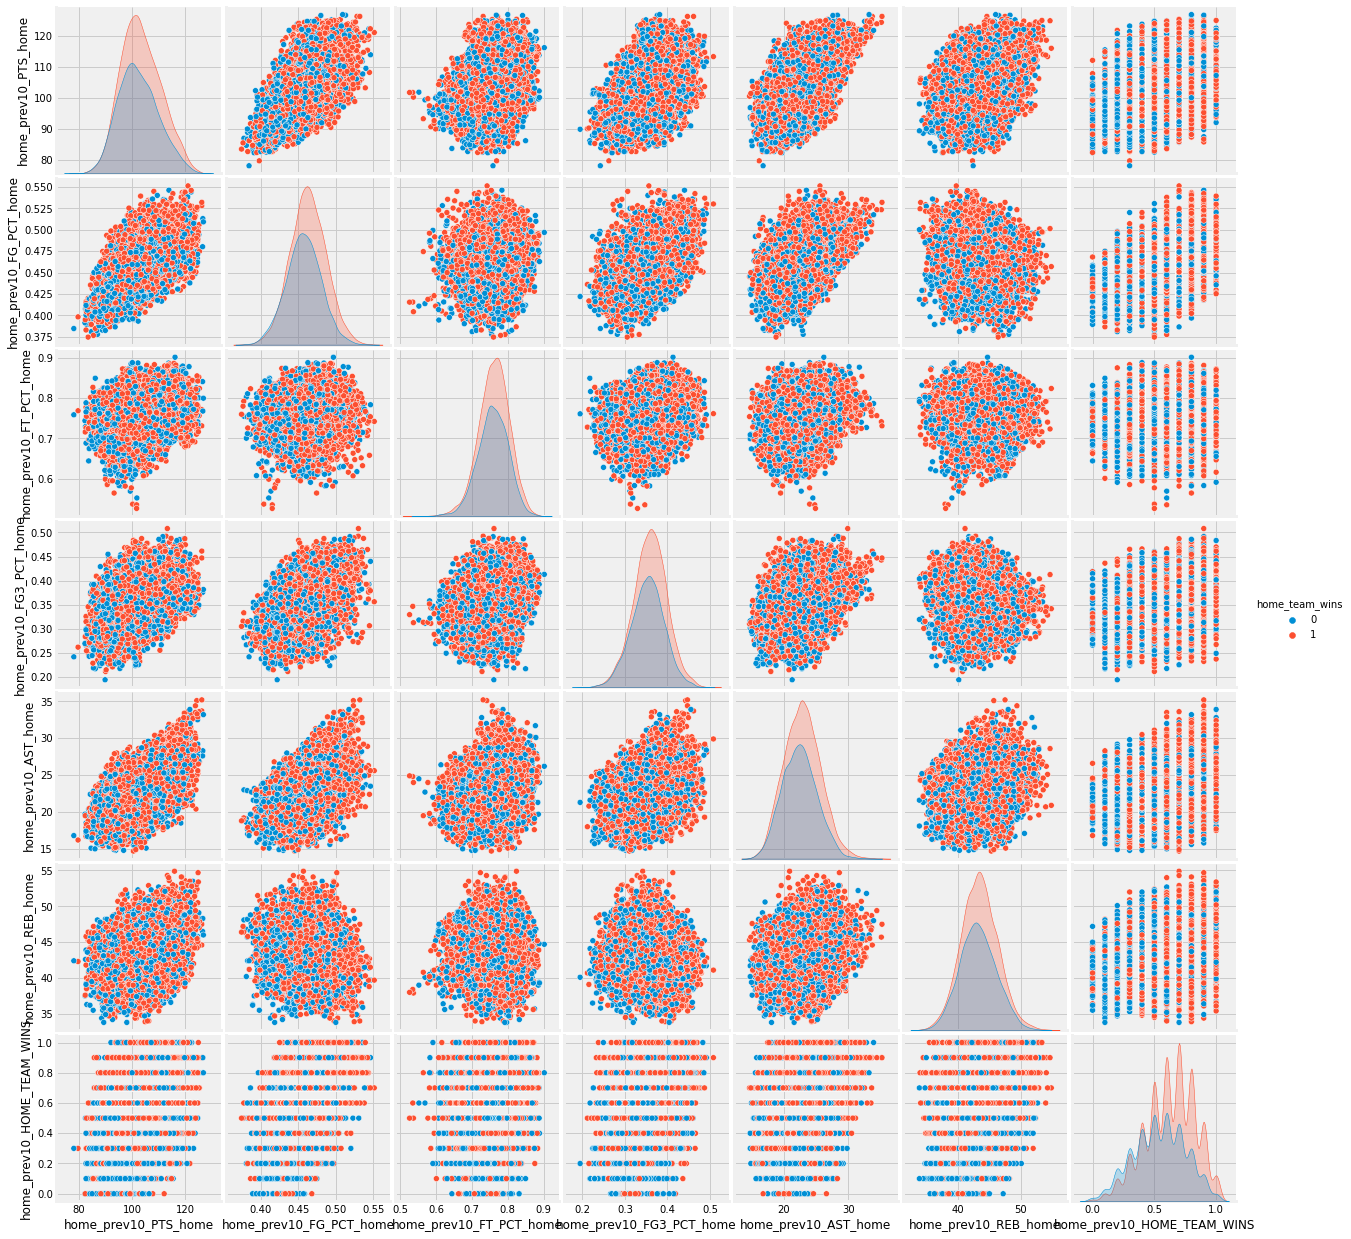

In [89]:
# home team, home prev 10
home_plot_df = train_df[['home_prev10_PTS_home', 'home_prev10_FG_PCT_home', 'home_prev10_FT_PCT_home', 'home_prev10_FG3_PCT_home', 'home_prev10_AST_home', 'home_prev10_REB_home', 'home_prev10_HOME_TEAM_WINS', 'home_team_wins']]
sns.pairplot(home_plot_df, hue='home_team_wins')

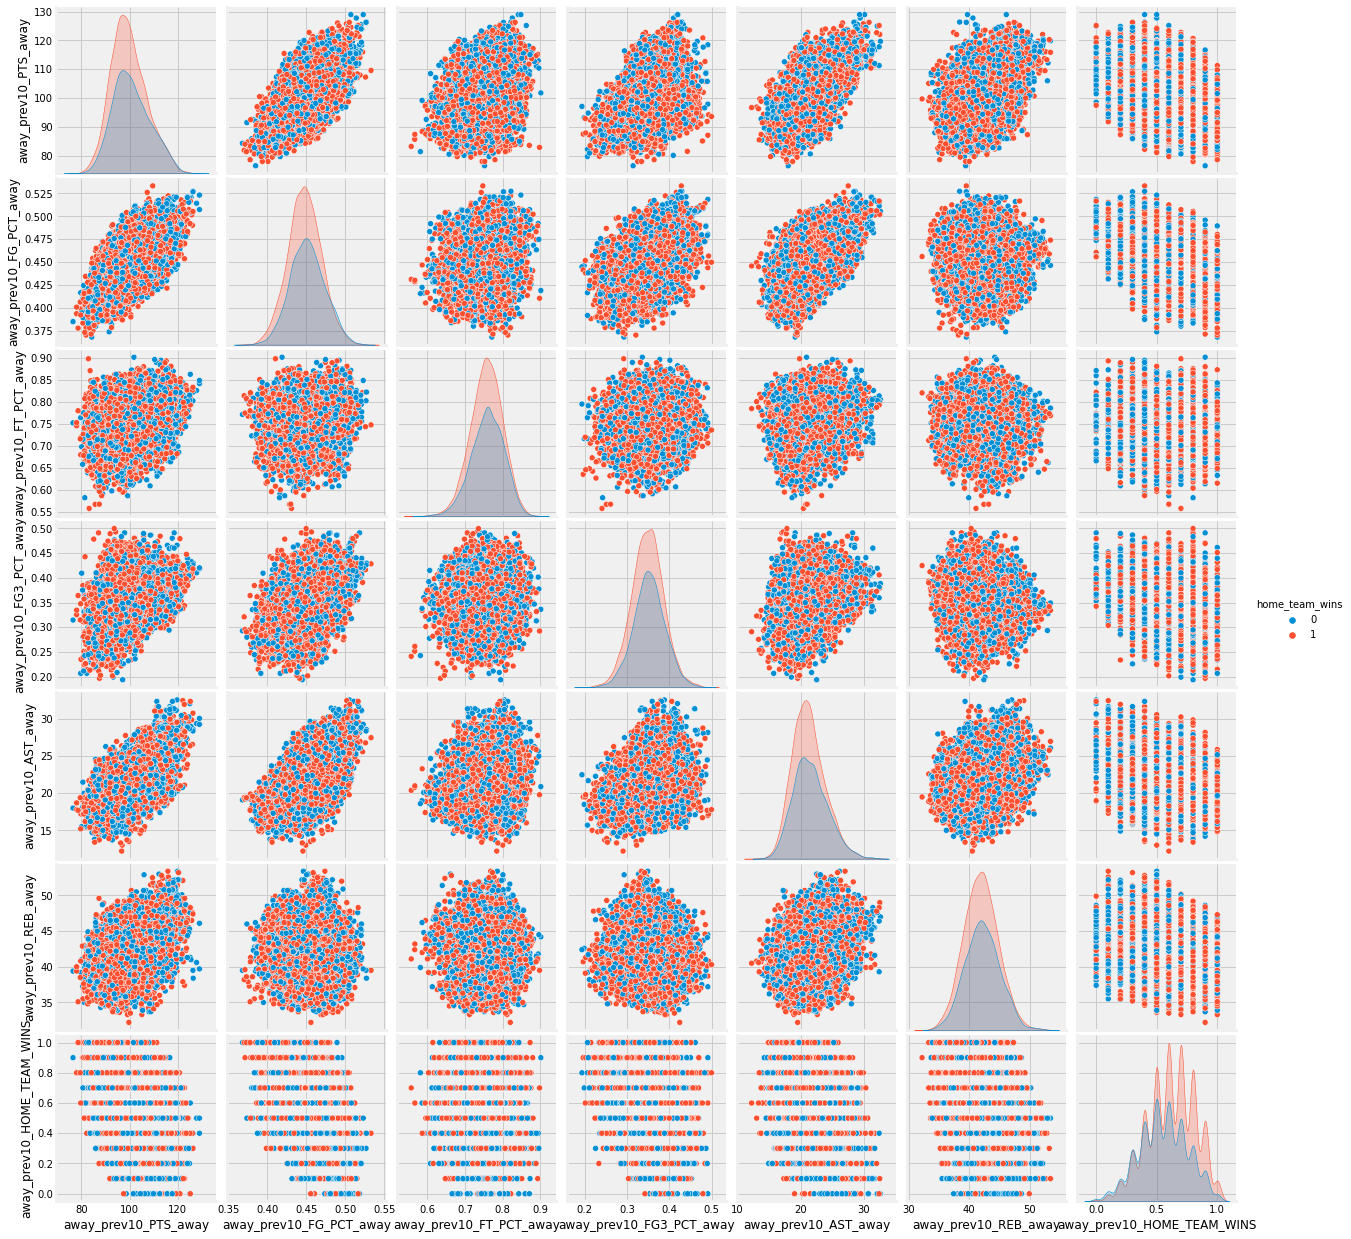

In [90]:
# away team, away prev 10
sns.pairplot(train_df[['away_prev10_PTS_away',
       'away_prev10_FG_PCT_away', 'away_prev10_FT_PCT_away',
       'away_prev10_FG3_PCT_away', 'away_prev10_AST_away',
       'away_prev10_REB_away', 'away_prev10_HOME_TEAM_WINS', 'home_team_wins']], hue='home_team_wins')

### Thoughts on pair plots

- above 2 sets: 'home_prev10_HOME_TEAM_WINS', and 'away_prev10_HOME_TEAM_WINS shows the separation that we want between 0 and 1.

- below 2 sets: we do NOT see the separation for 'homeall_prev10_HOME_TEAM_WINS' and 'awayall_prev10_HOME_TEAM_WINS'
*** the reason for this is because the there's a mixture of when the team is home and away, yet HTW is always from the persective of the home team, which may be the opposing team! These features were removed above.

In [91]:
# home team, all prev 10
# sns.pairplot(train_df[['homeall_prev10_PTS', 'homeall_prev10_FG_PCT',
#        'homeall_prev10_FT_PCT', 'homeall_prev10_FG3_PCT', 'homeall_prev10_AST',
#        'homeall_prev10_REB', 'homeall_prev10_HOME_TEAM_WINS', 'home_team_wins']], hue='home_team_wins')

In [92]:
# # away team, all prev 10
# sns.pairplot(train_df[['awayall_prev10_PTS', 'awayall_prev10_FG_PCT',
#        'awayall_prev10_FT_PCT', 'awayall_prev10_FG3_PCT', 'awayall_prev10_AST',
#        'awayall_prev10_REB', 'awayall_prev10_HOME_TEAM_WINS', 'home_team_wins']], hue='home_team_wins')

In [93]:
# # all features
# sns.pairplot(train_df, hue='home_team_wins')

Logistic Regression for 1 feature:

In [94]:
lm1 = LogisticRegression(C=1000) # setting C very high essentially removes regularization
lm1.fit(X_train[['home_prev10_FG_PCT_home']], y_train)
lm1.score(X_train[['home_prev10_FG_PCT_home']], y_train) # on training set

0.5934760448521916

In [95]:
lm1.score(X_test[['home_prev10_FG_PCT_home']], y_test)

0.5900937627395026

Logistic Regression for 2 features: (need to scale)

In [96]:
std_scale = StandardScaler()

# X_train = train_df.iloc[:, :-1]
X_train = train_df[['home_prev10_PTS_home', 'home_prev10_FG_PCT_home']]
X_train_scaled = std_scale.fit_transform(X_train) # scale to make sure that one feature is weighed more heavily than another feature (especially when clustering); RF is more robust to this. if not scaled there's an issue with differing magnituteds. subtract mean and divide my sd with scaling...; the fitis stored in std_scale

lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)

y_predict = lm.predict(X_train_scaled) 
lm.score(X_train_scaled, y_train)

0.5927624872579002

In [97]:
X_test_scaled = std_scale.transform(X_test[['home_prev10_PTS_home', 'home_prev10_FG_PCT_home']]) #!!! not, fit_transformed, now, since we already fit on the test set, don't want to refit here, simply transform.

lm.score(X_test_scaled, y_test)

0.5907052588666939

### logistic regression - fit on ALL features

In [98]:
features_2.columns

Index(['game_id', 'GAME_DATE_EST', 'home_prev10_PTS_home',
       'home_prev10_FG_PCT_home', 'home_prev10_FT_PCT_home',
       'home_prev10_FG3_PCT_home', 'home_prev10_AST_home',
       'home_prev10_REB_home', 'home_prev10_HOME_TEAM_WINS',
       'away_prev10_PTS_away', 'away_prev10_FG_PCT_away',
       'away_prev10_FT_PCT_away', 'away_prev10_FG3_PCT_away',
       'away_prev10_AST_away', 'away_prev10_REB_away',
       'away_prev10_HOME_TEAM_WINS', 'homeall_prev10_PTS',
       'homeall_prev10_FG_PCT', 'homeall_prev10_FT_PCT',
       'homeall_prev10_FG3_PCT', 'homeall_prev10_AST', 'homeall_prev10_REB',
       'awayall_prev10_PTS', 'awayall_prev10_FG_PCT', 'awayall_prev10_FT_PCT',
       'awayall_prev10_FG3_PCT', 'awayall_prev10_AST', 'awayall_prev10_REB',
       'home_team_wins', 'win_lose'],
      dtype='object')

In [99]:
feat_col = ['home_prev10_PTS_home',
       'home_prev10_FG_PCT_home', 'home_prev10_FT_PCT_home',
       'home_prev10_FG3_PCT_home', 'home_prev10_AST_home',
       'home_prev10_REB_home', 'home_prev10_HOME_TEAM_WINS',
       'away_prev10_PTS_away', 'away_prev10_FG_PCT_away',
       'away_prev10_FT_PCT_away', 'away_prev10_FG3_PCT_away',
       'away_prev10_AST_away', 'away_prev10_REB_away',
       'away_prev10_HOME_TEAM_WINS', 'homeall_prev10_PTS',
       'homeall_prev10_FG_PCT', 'homeall_prev10_FT_PCT',
       'homeall_prev10_FG3_PCT', 'homeall_prev10_AST', 'homeall_prev10_REB', 'awayall_prev10_PTS',
       'awayall_prev10_FG_PCT', 'awayall_prev10_FT_PCT',
       'awayall_prev10_FG3_PCT', 'awayall_prev10_AST', 'awayall_prev10_REB']

In [100]:
std_scale = StandardScaler()

# X_train = train_df.iloc[:, :-1]
X_train = train_df[feat_col]
X_train_scaled = std_scale.fit_transform(X_train)

lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)

y_predict = lm.predict(X_train_scaled) 
lm.score(X_train_scaled, y_train)

# initial 24 model: 0.6142711518858308
# after adding prev10 win%, 28% model: 0.6427115188583078
# went up by + 0.028440366972476983 ~ 2.84%
# - after changing it to previous 5 instead of 10: 0.626594452318283
# - after changing it to previous 15: 0.6495025130782645
# switched back to previous 10 game averages.

0.6404689092762488

In [101]:
X_test_scaled = std_scale.transform(X_test[feat_col]) #!!! not, fit_transformed, now, since we already fit on the train set, don't want to refit here, simply transform.
lm.score(X_test_scaled, y_test) # test accuracy = 65%

0.6518548715858133

In [206]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, lm.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47      1989
           1       0.67      0.83      0.74      2917

    accuracy                           0.65      4906
   macro avg       0.64      0.61      0.61      4906
weighted avg       0.64      0.65      0.63      4906



In [102]:
lr_predictions = lm.predict_proba(X_test_scaled)

In [103]:
lm.coef_

array([[-0.05207297, -0.01158663,  0.02747376, -0.0364991 ,  0.04861216,
        -0.0408976 ,  0.3897328 , -0.10308888,  0.12730163,  0.01735103,
         0.03688581,  0.01059362,  0.11246754,  0.33612429,  0.01218963,
         0.17034327,  0.02204872,  0.02380957, -0.00061254,  0.10969467,
         0.0687442 , -0.20526388, -0.04744455, -0.02944075, -0.03614993,
        -0.13090475]])

Random Forest

In [104]:
X = features_2[feat_col]  # Features
y = features_2['home_team_wins']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test; consistent, like we did for Log Reg.

# X_train, X_test, y_train, y_test = train_test_split(features_2.iloc[:, 2:-2], features_2.iloc[:, -2], 
#                                                     test_size = 0.2, random_state=42) 
#                                                     # random state is like set seed

# train_df = X_train.copy()
# train_df['home_team_wins'] = y_train
# train_df.head()


from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100) # how many decision trees we want in our RF, RF is an ensemble of decision trees.

#Train the model using the training sets y_pred=rf.predict(X_test)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

Random Forest Accuracy

In [105]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred_train = rf.predict(X_train)
print("Accuracy: " , metrics.accuracy_score(y_train, y_pred_train)) # accuracy 1.0 = over fitting. get rid of useless features and get train accuracy down, and test accuracy up. in addition to find more features... 

# Model Accuracy, how often is the classifier correct?
print("Accuracy: " , metrics.accuracy_score(y_test, y_pred))
rf_predictions = rf.predict_proba(X_test)

# initial model - 24 features, no win% history: Accuracy:  0.6079097580864365
# 28 features after adding prev10 win%: Accuracy:  0.6216363142158196
# + 0.013726556129383005 ~ +1.37%
# - after changing it to previous 5 instead of 10: 0.6153327034687542
# - after changing it to previous 15 instead of 10Accuracy:  0.6210339168490153

Accuracy:  1.0
Accuracy:  0.6373827965756217


In [208]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.38      0.46      1989
           1       0.66      0.81      0.73      2917

    accuracy                           0.64      4906
   macro avg       0.62      0.60      0.59      4906
weighted avg       0.63      0.64      0.62      4906



Gradient Boosted Trees

In [106]:
import xgboost as xgb

In [107]:
#Split data into 3: 60% train, 20% validation, 20% test # validation is final.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [108]:
# gbm = xgb.XGBClassifier( 
#                         n_estimators=30000,
#                         max_depth=4,
#                         objective='binary:logistic', #new objective
#                         learning_rate=.05, 
#                         subsample=.8,
#                         min_child_weight=3,
#                         colsample_bytree=.8
#                        )

# eval_set=[(X_train,y_train),(X_val,y_val)]
# fit_model = gbm.fit( 
#                     X_train, y_train, 
#                     eval_set=eval_set,
#                     eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
#                     early_stopping_rounds=50,
#                     verbose=False
#                    )

# accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))

In [109]:
gbm = xgb.XGBClassifier( 
                        n_estimators=100,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       ) # n_estimators, is # of trees we want to use.

# eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))

C:\Users\k\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\k\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.6418671015083571

- initial model - 24 features, no win% history: Accuracy:  0.6072156543008561
- 28 features after adding prev10 win%: Accuracy:  0.6426824296779454
- went up by 0.03546677537708931 ~ +3.55%
- after changing it to prev 5 instead of 10: 0.6112573395424175
- after chaning it to prev 15 instead of 10: 0.6367179487179487

In [209]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)))

              precision    recall  f1-score   support

           0       0.60      0.36      0.45      1989
           1       0.66      0.84      0.74      2917

    accuracy                           0.64      4906
   macro avg       0.63      0.60      0.59      4906
weighted avg       0.63      0.64      0.62      4906



C:\Users\k\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [110]:
xg_predictions = gbm.predict_proba(X_test,ntree_limit=gbm.best_ntree_limit)

C:\Users\k\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [111]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

In [112]:
lr_auc_score = roc_auc_score(y_test, lr_predictions[:,1])

In [113]:
lr_auc_score

0.670450591037818

In [114]:
rf_auc_score = roc_auc_score(y_test, rf_predictions[:,1])

In [115]:
rf_auc_score

0.6455668156347742

In [116]:
gbm_auc_score = roc_auc_score(y_test, xg_predictions[:,1])

In [117]:
gbm_auc_score

0.6645010878308585

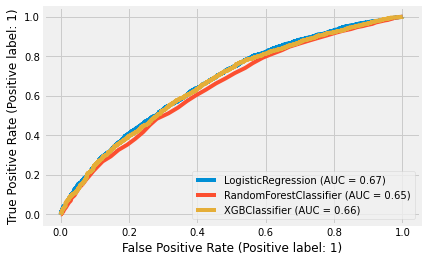

In [118]:
fig, ax = plt.subplots(1,1)
plot_roc_curve(lm, X_test_scaled, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(gbm, X_test, y_test, ax=ax)

#### Summary test accuracy (fit on all features): 
- Logistic Regression: 0.65
- Random Forest: 0.63 (train accuracy is 1.0 which means there's overfitting.)
- Gradient Boosted Trees: 0.64

# 5. Optimization by increasing threshold (increase precision)

In [120]:
features_2

game_id GAME_DATE_EST  home_prev10_PTS_home  home_prev10_FG_PCT_home  \
266    20300269    2003-12-05                 105.2                   0.4934   
267    20300268    2003-12-05                  91.4                   0.4431   
274    20300278    2003-12-06                  95.8                   0.4526   
281    20300283    2003-12-07                 105.5                   0.4808   
286    20300288    2003-12-08                  93.7                   0.4488   
...         ...           ...                   ...                      ...   
24861  22100218    2021-11-17                 110.7                   0.4439   
24862  22100217    2021-11-17                 109.1                   0.4644   
24863  22100216    2021-11-17                 106.7                   0.4659   
24864  22100214    2021-11-17                 100.7                   0.4187   
24865  22100213    2021-11-17                 105.6                   0.4213   

       home_prev10_FT_PCT_home  home_prev10_FG3_PCT_home  \
266                     0.7938                    0.4360   
267                     0.7482                    0.3393   
274                     0.7303                    0.3055   
281                     0.7966                    0.4513   
286                     0.7738                    0.2797   
...                        ...                       ...   
24861                   0.7962                    0.3596   
24862                   0.8145                    0.3511   
24863                   0.7904                    0.3466   
24864                   0.7968                    0.2779   
24865                   0.6953                    0.3336   

       home_prev10_AST_home  home_prev10_REB_home  home_prev10_HOME_TEAM_WINS  \
266                    28.8                  43.7                         1.0   
267                    23.1                  43.7                         0.8   
274                    20.3                  45.6                         0.7   
281                    27.9                  44.5                         0.9   
286                    20.6                  44.7                         0.9   
...                     ...                   ...                         ...   
24861                  23.1                  45.3                         0.6   
24862                  24.1                  46.0                         0.7   
24863                  24.1                  44.0                         0.6   
24864                  22.1                  43.2                         0.3   
24865                  25.5                  43.9                         0.4   

       away_prev10_PTS_away  away_prev10_FG_PCT_away  away_prev10_FT_PCT_away  \
266                    88.3                   0.4364                   0.7763   
267                    82.9                   0.4107                   0.8982   
274                    83.6                   0.4220                   0.8711   
281                    89.7                   0.4462                   0.7011   
286                    91.9                   0.4469                   0.7286   
...                     ...                      ...                      ...   
24861                 103.5                   0.4273                   0.7398   
24862                  96.5                   0.4057                   0.8104   
24863                 105.5                   0.4598                   0.7555   
24864                 105.6                   0.4619                   0.7282   
24865                 105.5                   0.4525                   0.7936   

       away_prev10_FG3_PCT_away  away_prev10_AST_away  away_prev10_REB_away  \
266                      0.3509                  20.4                  42.9   
267                      0.2924                  19.8                  39.5   
274                      0.3222                  20.1                  39.3   
281                      0.3593                  18.8           

In [125]:
X_train, X_test, y_train, y_test = train_test_split(features_2.iloc[:, 2:-2], features_2.iloc[:, -2], 
                                                    test_size = 0.2, random_state=42) 
                                                    # random state is like set seed

train_df = X_train.copy()
train_df['home_team_wins'] = y_train
train_df

home_prev10_PTS_home  home_prev10_FG_PCT_home  home_prev10_FT_PCT_home  \
4611                  111.7                   0.4829                   0.8392   
18176                 108.2                   0.4796                   0.7518   
13107                 105.2                   0.4980                   0.7911   
16289                  97.2                   0.4592                   0.7604   
13899                  93.4                   0.4240                   0.7511   
...                     ...                      ...                      ...   
21915                 115.5                   0.4740                   0.7843   
5730                   90.7                   0.3992                   0.7343   
1180                   99.3                   0.4897                   0.7321   
16135                  93.4                   0.4258                   0.7359   
23994                 115.6                   0.4675                   0.7439   

       home_prev10_FG3_PCT_home  home_prev10_AST_home  home_prev10_REB_home  \
4611                     0.3894                  25.6                  44.9   
18176                    0.3996                  23.3                  44.7   
13107                    0.3362                  22.4                  39.2   
16289                    0.3817                  24.3                  44.0   
13899                    0.3267                  20.4                  46.0   
...                         ...                   ...                   ...   
21915                    0.3499                  25.6                  45.6   
5730                     0.2841                  18.7                  41.1   
1180                     0.3784                  21.9                  44.3   
16135                    0.3513                  23.2                  45.7   
23994                    0.3637                  25.4                  43.3   

       home_prev10_HOME_TEAM_WINS  away_prev10_PTS_away  \
4611                          0.9                  93.5   
18176                         0.9                  98.8   
13107                         0.9                  97.9   
16289                         0.6                 103.4   
13899                         0.7                  90.9   
...                           ...                   ...   
21915                         0.7                 111.1   
5730                          0.3                  94.7   
1180                          1.0                  96.6   
16135                         0.5                  92.0   
23994                         0.5                 115.0   

       away_prev10_FG_PCT_away  away_prev10_FT_PCT_away  \
4611                    0.4650                   0.7080   
18176                   0.4448                   0.7057   
13107                   0.4282                   0.7500   
16289                   0.4353                   0.6939   
13899                   0.4039                   0.7743   
...                        ...                      ...   
21915                   0.4514                   0.8217   
5730                    0.4383                   0.7506   
1180                    0.4490                   0.7862   
16135                   0.4394                   0.7062   
23994                   0.4755                   0.7304   

       away_prev10_FG3_PCT_away  away_prev10_AST_away  away_prev10_REB_away  \
4611                     0.3300                  17.1                  40.3   
18176                    0.3391                  22.1                  40.6   
13107                    0.3590                  20.3                  42.7   
16289                    0.3320                  22.5                  41.8   
13899                    0.3111                  18.6                  42.6   
...                         ...                   ...                   ...   
21915                    0.3168                  22.4                  44.9   
5730                     0.3358    

In [160]:
X_train, X_test, y_train, y_test = train_test_split(features_2.iloc[:, 2:-2], features_2.iloc[:, -2], 
                                                    test_size = 0.2, random_state=42) 

train_df = X_train.copy()
train_df['home_team_wins'] = y_train

feat_col = ['home_prev10_PTS_home',
       'home_prev10_FG_PCT_home', 'home_prev10_FT_PCT_home',
       'home_prev10_FG3_PCT_home', 'home_prev10_AST_home',
       'home_prev10_REB_home', 'home_prev10_HOME_TEAM_WINS',
       'away_prev10_PTS_away', 'away_prev10_FG_PCT_away',
       'away_prev10_FT_PCT_away', 'away_prev10_FG3_PCT_away',
       'away_prev10_AST_away', 'away_prev10_REB_away',
       'away_prev10_HOME_TEAM_WINS', 'homeall_prev10_PTS',
       'homeall_prev10_FG_PCT', 'homeall_prev10_FT_PCT',
       'homeall_prev10_FG3_PCT', 'homeall_prev10_AST', 'homeall_prev10_REB', 'awayall_prev10_PTS',
       'awayall_prev10_FG_PCT', 'awayall_prev10_FT_PCT',
       'awayall_prev10_FG3_PCT', 'awayall_prev10_AST', 'awayall_prev10_REB']

std_scale = StandardScaler()

X_train = train_df[feat_col]
X_train_scaled = std_scale.fit_transform(X_train)

lr1 = LogisticRegression(C = 10000)
lr1.fit(X_train_scaled, y_train)

y_predict = lr1.predict(X_train_scaled) 
print('Train Accuracy: ' + str(lr1.score(X_train_scaled, y_train)))

X_test_scaled = std_scale.transform(X_test[feat_col]) #!!! not, fit_transformed, now, since we already fit on the train set, don't want to refit here, simply transform.
print('Test Accuracy: ' + str(lr1.score(X_test_scaled, y_test))) # test accuracy = 65%

Train Accuracy: 0.6404179408766565
Test Accuracy: 0.6520587036282104


Try changing hyperparameter, C :  
- for default C of 1.0  
Train Accuracy: 0.6404689092762488  
Test Accuracy: 0.6518548715858133  
- for C = 0.95    
Train Accuracy: 0.6405708460754332  
Test Accuracy: 0.6518548715858133  
- for C = 100000 (no regularization)  
Train Accuracy: 0.6404179408766565  
Test Accuracy: 0.6520587036282104  

- Changing C does not do much

In [161]:
from sklearn.metrics import confusion_matrix

print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, lr1.predict(X_test_scaled)))

Logistic Regression confusion matrix: 

 [[ 772 1217]
 [ 490 2427]]


In [162]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, lr1.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47      1989
           1       0.67      0.83      0.74      2917

    accuracy                           0.65      4906
   macro avg       0.64      0.61      0.61      4906
weighted avg       0.64      0.65      0.63      4906



In [142]:
# simple logistic regression accuracies using 1 feature at a time.
# no need to scale since we have only 1 feature

for col in feat_col:
    print(col)
    X_tr = X_train[[col]]
    X_te = X_test[[col]]
    lr_model = LogisticRegression()
    lr_model.fit(X_tr,y_train)
    print(lr_model.score(X_te, y_test))
    
# none of them are very accurate when used alone, home_prev10_HOME_TEAM_WINS is most promising: 0.6222992254382389

home_prev10_PTS_home
0.594170403587444
home_prev10_FG_PCT_home
0.594374235629841
home_prev10_FT_PCT_home
0.5945780676722381
home_prev10_FG3_PCT_home
0.5955972278842234
home_prev10_AST_home
0.5935589074602527
home_prev10_REB_home
0.5945780676722381
home_prev10_HOME_TEAM_WINS
0.6222992254382389
away_prev10_PTS_away
0.5931512433754587
away_prev10_FG_PCT_away
0.5953933958418264
away_prev10_FT_PCT_away
0.5945780676722381
away_prev10_FG3_PCT_away
0.594374235629841
away_prev10_AST_away
0.5947818997146351
away_prev10_REB_away
0.5945780676722381
away_prev10_HOME_TEAM_WINS
0.6055849979616795
homeall_prev10_PTS
0.594374235629841
homeall_prev10_FG_PCT
0.5964125560538116
homeall_prev10_FT_PCT
0.5945780676722381
homeall_prev10_FG3_PCT
0.5935589074602527
homeall_prev10_AST
0.5947818997146351
homeall_prev10_REB
0.5945780676722381
awayall_prev10_PTS
0.594170403587444
awayall_prev10_FG_PCT
0.5962087240114146
awayall_prev10_FT_PCT
0.5945780676722381
awayall_prev10_FG3_PCT
0.5951895637994292
awayall_prev1

In [163]:
# following function was modified from classification_error_metrics_student_revised notebook from Metis - Classification Module

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_scaled)[:, 1] >= threshold) # 1 for 2nd element for which probability of outcome being 1
    NBA_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(NBA_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Home Loses', 'Home Wins'],
           yticklabels=['Home Loses', 'Home Wins']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [200]:
# code modified from: https://datascience.stackexchange.com/questions/79579/how-to-extract-true-positives-data-complete-row-with-data-after-training-and-t

# pred = model.predict(X_test)

pred = lr1.predict_proba(X_test_scaled)[:,1] >= 0.88
pred1 = np.where(pred==1)

TP_Indexes = []
for k in pred1[0]:
    if(y_test.iloc[k] == 1):
        TP_Indexes.append(k)

X_test_TP = X_test.iloc[TP_Indexes]
print(X_test_TP.shape)
print(len(pred1[0])) # 100% precision at 0.88 accuracy
X_test_TP # is a DF
y_test.iloc[TP_Indexes].index

(14, 26)
14


Int64Index([10721,  6476,  3758, 16847, 17021, 15560, 12316, 16972, 10855,
             3899, 10276, 16316, 13296, 18617],
           dtype='int64')

In [204]:
pred1

(array([ 182,  405,  625,  808, 1017, 1021, 1683, 1725, 1914, 2073, 2194,
        3219, 3314, 4661], dtype=int64),)

In [205]:
pred1[0]

array([ 182,  405,  625,  808, 1017, 1021, 1683, 1725, 1914, 2073, 2194,
       3219, 3314, 4661], dtype=int64)

In [202]:
df.loc[y_test.iloc[TP_Indexes].index]

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
10721    2008-04-24  40700123            Final    1610612761       1610612753   
6476     2011-04-13  21001229            Final    1610612756       1610612759   
3758     2013-10-24  11300104            Final    1610612766       1610612739   
16847    2004-02-04  20300705            Final    1610612745       1610612749   
17021    2004-01-12  20300530            Final    1610612753       1610612755   
15560    2005-02-02  20400670            Final    1610612755       1610612745   
12316    2007-03-28  20601068            Final    1610612746       1610612745   
16972    2004-01-18  20300577            Final    1610612756       1610612757   
10855    2008-04-02  20701118            Final    1610612763       1610612752   
3899     2013-05-03  41200116            Final    1610612738       1610612752   
10276    2008-12-03  20800269            Final    1610612738       1610612754   
16316    2004-05-05  40300232            Final    1610612759       1610612747   
13296    2006-11-10  20600075            Final    1610612766       1610612760   
18617    2019-01-25  21800729            Final    1610612762       1610612750   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  \
10721    2007    1610612761     108.0        0.494        0.857         0.353   
6476     2010    1610612756     106.0        0.402        0.828         0.421   
3758     2013    1610612766     105.0        0.451        0.686         0.350   
16847    2003    1610612745     103.0        0.494        0.909         0.368   
17021    2003    1610612753      82.0        0.360        0.783         0.111   
15560    2004    1610612755      95.0        0.436        0.686         0.214   
12316    2006    1610612746      87.0        0.421        0.842         0.412   
16972    2003    1610612756      96.0        0.429        0.810         0.412   
10855    2007    1610612763     130.0        0.600        0.731         0.455   
3899     2012    1610612738      80.0        0.381        0.788         0.273   
10276    2008    1610612738     114.0        0.500        0.813         0.364   
16316    2003    1610612759      95.0        0.522        0.600         0.238   
13296    2006    1610612766      85.0        0.397        0.818         0.385   
18617    2018    1610612762     106.0        0.394        0.760         0.325   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
10721      31.0      42.0    1610612753      94.0        0.466        0.741   
6476       23.0      46.0    1610612759     103.0        0.427        0.757   
3758       27.0      37.0    1610612739      92.0        0.420        0.857   
16847      21.0      37.0    1610612749      89.0        0.372        0.778   
17021      15.0      43.0    1610612755      87.0        0.413        0.792   
15560      19.0      32.0    1610612745     118.0        0.539        0.786   
12316      25.0      36.0    1610612745      92.0        0.450        0.889   
16972      20.0      43.0    1610612757      92.0        0.430        0.739   
10855      21.0      42.0    1610612752     114.0        0.442        0.781   
3899       13.0      35.0    1610612752      88.0        0.418        0.813   
10276      27.0      54.0    1610612754      96.0        0.440        0.692   
16316      17.0      33.0    1610612747      85.0        0.514        0.389   
13296      20.0      40.0    1610612760      99.0        0.474        0.913   
18617      25.0      47.0    1610612750     102.0        0.422        0.857   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
10721         0.222      15.0      34.0               1  
6476          0.238      19.0      51.0               1  
3758          0.333      19.0      48.0               1  
16847         0.308      19.0      46.0               1  
17021         0.200      14.0      46.0               0  
15560         0.560      35.0      47.0 

In [188]:
type(pred1[0])
pred1[0]

array([ 182,  405,  625,  808, 1017, 1021, 1683, 1725, 1914, 2073, 2194,
       3219, 3314, 4661], dtype=int64)

In [191]:
y_test.iloc[182]

1

In [180]:
type(y_predict)
y_predict.shape
y_predict
temp = lr1.predict_proba(X_test_scaled)[:,1] >= 0.88

In [176]:
y_test.index

Int64Index([21243, 10502, 18596,  6392, 11415,  4592,  7955,  5699, 19499,
             4116,
            ...
            20887,  9130,  4716,  2269, 13279, 21557,  8694, 16784, 12096,
             8591],
           dtype='int64', length=4906)

In [177]:
y_test

21243    1
10502    1
18596    1
6392     1
11415    0
        ..
21557    0
8694     0
16784    0
12096    1
8591     1
Name: home_team_wins, Length: 4906, dtype: int64

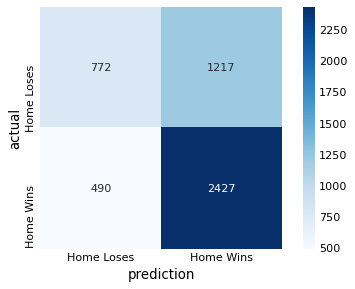

In [164]:
make_confusion_matrix(lr1)

In [169]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lr1, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

What happens if we simply take the last 10,000 rows from the features 2 df? i.e. ignore the first 14,000 or so rows.  
- test accuracy went down a little 

In [150]:
# X_train, X_test, y_train, y_test = train_test_split(features_2.iloc[-10000:, 2:-2], features_2.iloc[-10000:, -2], 
#                                                     test_size = 0.2, random_state=42) 

# train_df = X_train.copy()
# train_df['home_team_wins'] = y_train

# feat_col = ['home_prev10_PTS_home',
#        'home_prev10_FG_PCT_home', 'home_prev10_FT_PCT_home',
#        'home_prev10_FG3_PCT_home', 'home_prev10_AST_home',
#        'home_prev10_REB_home', 'home_prev10_HOME_TEAM_WINS',
#        'away_prev10_PTS_away', 'away_prev10_FG_PCT_away',
#        'away_prev10_FT_PCT_away', 'away_prev10_FG3_PCT_away',
#        'away_prev10_AST_away', 'away_prev10_REB_away',
#        'away_prev10_HOME_TEAM_WINS', 'homeall_prev10_PTS',
#        'homeall_prev10_FG_PCT', 'homeall_prev10_FT_PCT',
#        'homeall_prev10_FG3_PCT', 'homeall_prev10_AST', 'homeall_prev10_REB', 'awayall_prev10_PTS',
#        'awayall_prev10_FG_PCT', 'awayall_prev10_FT_PCT',
#        'awayall_prev10_FG3_PCT', 'awayall_prev10_AST', 'awayall_prev10_REB']

# std_scale = StandardScaler()

# X_train = train_df[feat_col]
# X_train_scaled = std_scale.fit_transform(X_train)

# lr2 = LogisticRegression() #C = 10000)
# lr2.fit(X_train_scaled, y_train)

# y_predict = lr2.predict(X_train_scaled) 
# print('Train Accuracy: ' + str(lr2.score(X_train_scaled, y_train)))

# X_test_scaled = std_scale.transform(X_test[feat_col]) #!!! not, fit_transformed, now, since we already fit on the train set, don't want to refit here, simply transform.
# print('Test Accuracy: ' + str(lr2.score(X_test_scaled, y_test))) # test accuracy = 65%
# print(classification_report(y_test, lr2.predict(X_test_scaled)))

# # Accuracy went down a little. let's just use all of the rows.

Train Accuracy: 0.63775
Test Accuracy: 0.6315
              precision    recall  f1-score   support

           0       0.58      0.43      0.49       836
           1       0.65      0.78      0.71      1164

    accuracy                           0.63      2000
   macro avg       0.62      0.60      0.60      2000
weighted avg       0.62      0.63      0.62      2000



In [144]:
# X_train.shape # 80/20 split, so, correctly has 8000 rows

(8000, 26)

Let's continue our analysis on lr1 where we used all 24000+ rows...

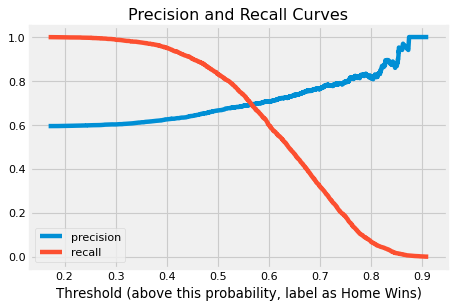

In [172]:
# code modified from Metis notebook: classification_error_metrics_student_revised
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm.predict_proba(X_test_scaled)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Home Wins)');
plt.title('Precision and Recall Curves');

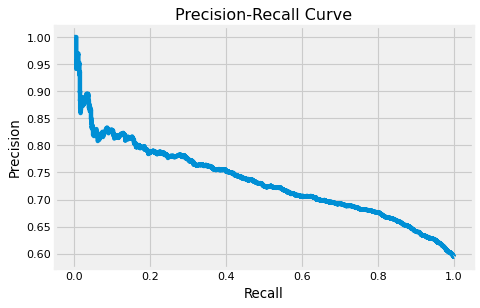

In [173]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");